## [NSNet: A General Neural Probabilistic Framework for Satisfiability Problems](https://arxiv.org/pdf/2211.03880.pdf) (nov. 2022)

- Slides (NIPS): https://nips.cc/media/neurips-2022/Slides/53766.pdf


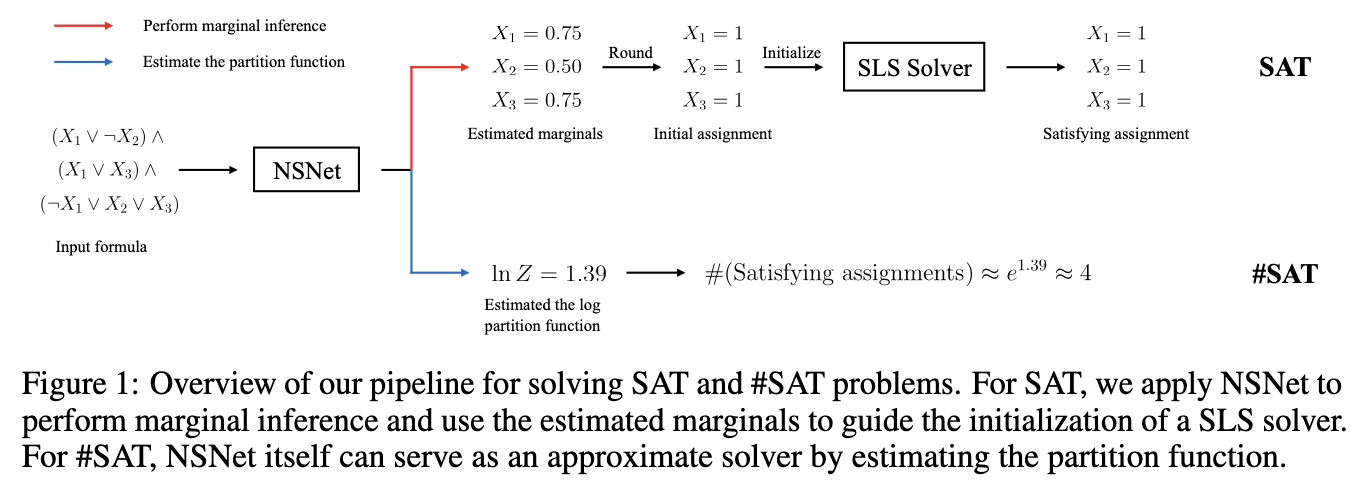

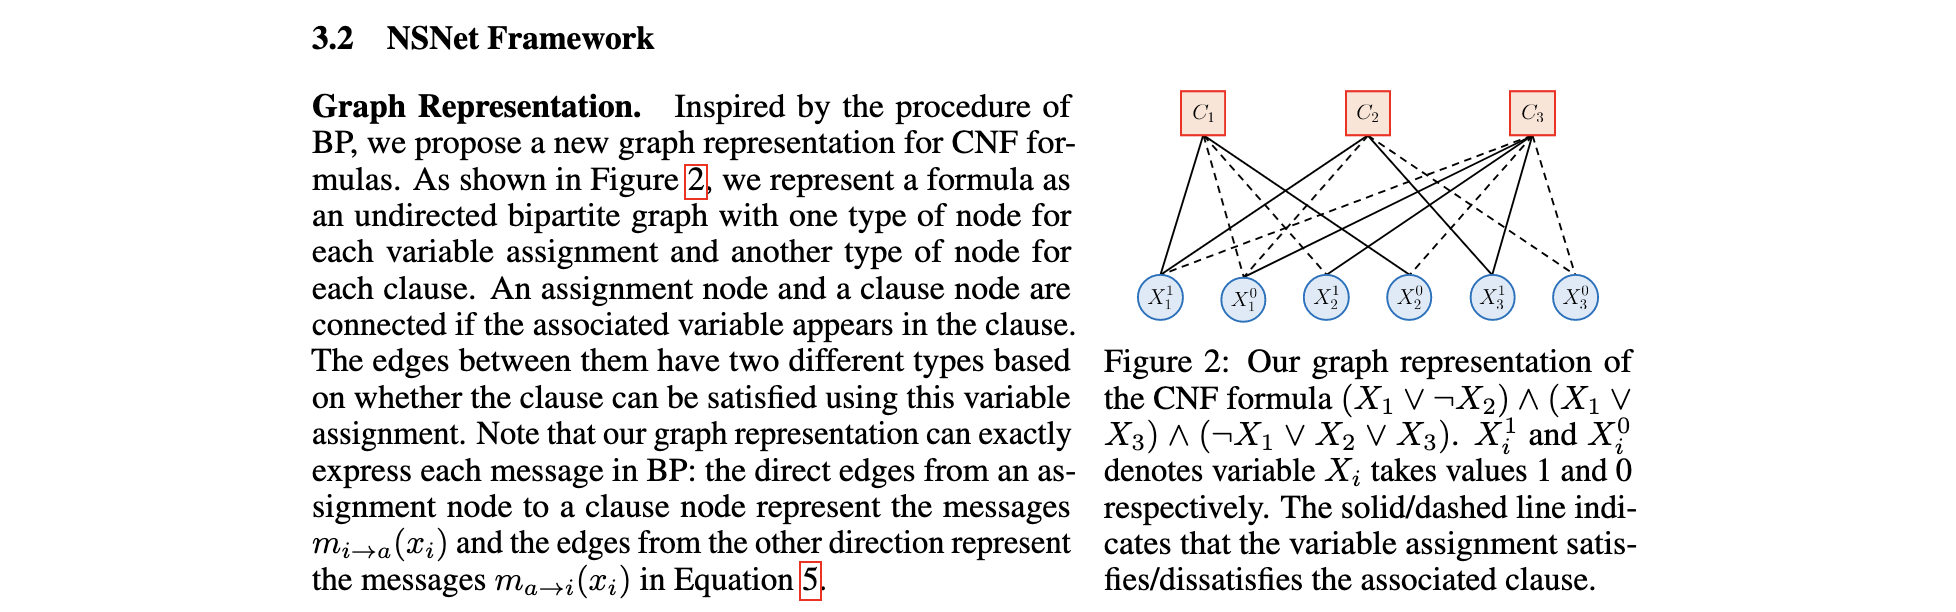

### Short dataset overview

#### Test / train dataset: 3-SAT, SR, Community Attachment (community structure)

Train instances (30.000 per 3SAT/CA/SR): 10 to 40 variables

Validation instances (10.000 per 3SAT/CA/SR): 10 to 40 variables

**Test instances (hard)** (10.000 per 3SAT/CA/SR): **40 to 200 variables**

#### Instance types - Community attachment (description)

- Jesús Giráldez-Cru and Jordi Levy. A modularity-based random sat instances generator. In Twenty-Fourth International Joint Conference on Artificial Intelligence, 2015.

- https://www.ugr.es/~jgiraldez/publications/2016_AIJ_abstract.html:


Generating SAT instances with community structure - Artificial Intelligence 2016

Nowadays, modern SAT solvers are able to efficiently solve many industrial, or real-world, SAT instances. However, the process of development and testing of new SAT solving techniques is conditioned to the finite and reduced number of known industrial benchmarks. Therefore, new models of random SAT instances generation that capture realistically the features of real-world problems can be beneficial to the SAT community. In many works, the structure of industrial instances has been analyzed representing them as graphs and studying some of their properties, like modularity.

In this work, we use the notion of modularity to define a new model of generation of random SAT instances with community structure, called Community Attachment. For **high values of modularity (i.e., clear community structure)**, we realistically model pseudo-industrial random SAT formulas. This model also generates SAT instances very similar to classical random formulas using a low value of modularity. We also prove that the phase transition point, if exists, is independent on the modularity. We evaluate the adequacy of this model to real industrial SAT problems in terms of SAT solvers performance, and show that modern solvers do actually exploit this community structure. Finally, we use this generator to observe the connections between the modularity of the instance and some components of the solver, such as the variable branching heuristics or the clause learning mechanism.

### Training

For each `.cnf` file we compute the target marginals using ALLSAT solver bdd_minisat_all: http://www.sd.is.uec.ac.jp/toda/code/cnf2obdd.html.

The outputs (targets) are saved in a pickle file.

We train the model using as targets the marginals assigned by the solver mentioned above.

#### Training on each dataset: 3-SAT, SR, CA

We train *a* model from scratch on *each* of the synthetic datasets (resulting in 3 trained models).

We use a GeForce RTX 3080 for training. One epoch takes approximately 2:40 min to train. This duration can slightly vary depending on the dataset, SR, 3-SAT, CA (ie. number of variables / clauses). Thus for 200 epochs, more than 9 hours of training is required (including intermediate validation runs to compute validation loss). However, we can see in the graph below that the loss appears to reach a minimum after some 75 epochs or less.

From our experiments we also note that training very is sensible to the initialization (in particular the learning rate) and can sometimes diverge. If divergence occurs, we need to either restart training from scratch or resume from a reasonable checkpoint, after lowering the learning rate.


##### Log of train run on `3-SAT` dataset (with parameters):

```bash
$ ./scripts/sat_nsnet_3-sat.sh
Namespace(task='sat-solving', exp_id='sat_nsnet_3-sat_marginal', train_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/train/', train_size=None, valid_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/valid/', loss='marginal', restore=None, save_model_epochs=1, num_workers=8, batch_size=64, epochs=200, lr=0.0001, weight_dacay=1e-10, scheduler='ReduceLROnPlateau', lr_step_size=20, lr_factor=0.5, lr_patience=20, clip_norm=0.65, seed=0, valid_epochs=1, device='cuda', model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='runs/sat_nsnet_3-sat_marginal', checkpoint_dir='runs/sat_nsnet_3-sat_marginal/checkpoints', log='runs/sat_nsnet_3-sat_marginal/log.txt')
EPOCH #0
Training...
100%|##########| 469/469 [01:18<00:00,  6.01it/s]
Training LR: 0.000100, Training loss: 0.168905
Training accuracy: 0.282267
Validating...
Validating loss: 0.128277
Validating accuracy: 0.478600
EPOCH #1
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000100, Training loss: 0.128887
Training accuracy: 0.478300
Validating...
Validating loss: 0.129092
Validating accuracy: 0.450200
EPOCH #2
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000100, Training loss: 0.127783
Training accuracy: 0.489633
Validating...
Validating loss: 0.127278
Validating accuracy: 0.529700
EPOCH #3
Training...
100%|##########| 469/469 [01:16<00:00,  6.10it/s]
Training LR: 0.000100, Training loss: 0.127217
Training accuracy: 0.498433
Validating...
Validating loss: 0.125900
Validating accuracy: 0.504700
EPOCH #4
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000100, Training loss: 0.126149
Training accuracy: 0.502900
Validating...
Validating loss: 0.125516
Validating accuracy: 0.508500
EPOCH #5
Training...
100%|##########| 469/469 [01:18<00:00,  6.00it/s]
Training LR: 0.000100, Training loss: 0.125659
Training accuracy: 0.507400
Validating...
Validating loss: 0.126053
Validating accuracy: 0.494300
EPOCH #6
Training...
100%|##########| 469/469 [01:17<00:00,  6.07it/s]
Training LR: 0.000100, Training loss: 0.125525
Training accuracy: 0.511133
Validating...
Validating loss: 0.125278
Validating accuracy: 0.521200
EPOCH #7
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000100, Training loss: 0.125488
Training accuracy: 0.507333
Validating...
Validating loss: 0.125307
Validating accuracy: 0.520400
EPOCH #8
Training...
100%|##########| 469/469 [01:18<00:00,  6.01it/s]
Training LR: 0.000100, Training loss: 0.125178
Training accuracy: 0.510567
Validating...
Validating loss: 0.125485
Validating accuracy: 0.502000
EPOCH #9
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000100, Training loss: 0.125031
Training accuracy: 0.514467
Validating...
Validating loss: 0.125513
Validating accuracy: 0.538000
EPOCH #10
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000100, Training loss: 0.125092
Training accuracy: 0.515300
Validating...
Validating loss: 0.125100
Validating accuracy: 0.508300
EPOCH #11
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000100, Training loss: 0.125114
Training accuracy: 0.514000
Validating...
Validating loss: 0.125297
Validating accuracy: 0.501900
EPOCH #12
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000100, Training loss: 0.124934
Training accuracy: 0.515167
Validating...
Validating loss: 0.125357
Validating accuracy: 0.540700
EPOCH #13
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000100, Training loss: 0.125139
Training accuracy: 0.518367
Validating...
Validating loss: 0.125132
Validating accuracy: 0.527900
EPOCH #14
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000100, Training loss: 0.124904
Training accuracy: 0.515367
Validating...
Validating loss: 0.125675
Validating accuracy: 0.539400
EPOCH #15
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000100, Training loss: 0.125004
Training accuracy: 0.515567
Validating...
Validating loss: 0.124998
Validating accuracy: 0.521100
EPOCH #16
Training...
100%|##########| 469/469 [01:19<00:00,  5.90it/s]
Training LR: 0.000100, Training loss: 0.124996
Training accuracy: 0.517500
Validating...
Validating loss: 0.127039
Validating accuracy: 0.531600
EPOCH #17
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000100, Training loss: 0.126041
Training accuracy: 0.501400
Validating...
Validating loss: 0.125524
Validating accuracy: 0.507900
EPOCH #18
Training...
100%|##########| 469/469 [01:18<00:00,  5.98it/s]
Training LR: 0.000100, Training loss: 0.125690
Training accuracy: 0.511900
Validating...
Validating loss: 0.125153
Validating accuracy: 0.520200
EPOCH #19
Training...
100%|##########| 469/469 [01:18<00:00,  5.94it/s]
Training LR: 0.000100, Training loss: 0.125324
Training accuracy: 0.515867
Validating...
Validating loss: 0.125916
Validating accuracy: 0.531200
EPOCH #20
Training...
100%|##########| 469/469 [01:18<00:00,  5.98it/s]
Training LR: 0.000100, Training loss: 0.125501
Training accuracy: 0.507700
Validating...
Validating loss: 0.126224
Validating accuracy: 0.539300
EPOCH #21
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000100, Training loss: 0.125383
Training accuracy: 0.510567
Validating...
Validating loss: 0.125625
Validating accuracy: 0.531100
EPOCH #22
Training...
100%|##########| 469/469 [01:18<00:00,  5.97it/s]
Training LR: 0.000100, Training loss: 0.125388
Training accuracy: 0.510367
Validating...
Validating loss: 0.125570
Validating accuracy: 0.524600
EPOCH #23
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000100, Training loss: 0.125370
Training accuracy: 0.511000
Validating...
Validating loss: 0.127035
Validating accuracy: 0.548400
EPOCH #24
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000100, Training loss: 0.125326
Training accuracy: 0.511333
Validating...
Validating loss: 0.131557
Validating accuracy: 0.560700
EPOCH #25
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000100, Training loss: 0.125501
Training accuracy: 0.511267
Validating...
Validating loss: 0.125874
Validating accuracy: 0.531800
EPOCH #26
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000100, Training loss: 0.125285
Training accuracy: 0.511467
Validating...
Validating loss: 0.125547
Validating accuracy: 0.530700
EPOCH #27
Training...
100%|##########| 469/469 [01:17<00:00,  6.08it/s]
Training LR: 0.000100, Training loss: 0.125286
Training accuracy: 0.513767
Validating...
Validating loss: 0.125446
Validating accuracy: 0.513400
EPOCH #28
Training...
100%|##########| 469/469 [01:18<00:00,  6.00it/s]
Training LR: 0.000100, Training loss: 0.125232
Training accuracy: 0.513267
Validating...
Validating loss: 0.125554
Validating accuracy: 0.504500
EPOCH #29
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000100, Training loss: 0.125318
Training accuracy: 0.513767
Validating...
Validating loss: 0.125353
Validating accuracy: 0.514900
EPOCH #30
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000100, Training loss: 0.125379
Training accuracy: 0.510667
Validating...
Validating loss: 0.125535
Validating accuracy: 0.500400
EPOCH #31
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000100, Training loss: 0.125327
Training accuracy: 0.513800
Validating...
Validating loss: 0.125300
Validating accuracy: 0.528800
EPOCH #32
Training...
100%|##########| 469/469 [01:18<00:00,  6.01it/s]
Training LR: 0.000100, Training loss: 0.125460
Training accuracy: 0.514367
Validating...
Validating loss: 0.127145
Validating accuracy: 0.479000
EPOCH #33
Training...
100%|##########| 469/469 [01:17<00:00,  6.01it/s]
Training LR: 0.000100, Training loss: 0.125483
Training accuracy: 0.513800
Validating...
Validating loss: 0.125344
Validating accuracy: 0.525000
EPOCH #34
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000100, Training loss: 0.125193
Training accuracy: 0.518033
Validating...
Validating loss: 0.126344
Validating accuracy: 0.484800
EPOCH #35
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000100, Training loss: 0.125349
Training accuracy: 0.512900
Validating...
Validating loss: 0.125177
Validating accuracy: 0.522900
EPOCH #36
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000100, Training loss: 0.125349
Training accuracy: 0.515933
Validating...
Validating loss: 0.125401
Validating accuracy: 0.528400
EPOCH #37
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000050, Training loss: 0.125030
Training accuracy: 0.519200
Validating...
Validating loss: 0.125279
Validating accuracy: 0.523500
EPOCH #38
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.124938
Training accuracy: 0.518433
Validating...
Validating loss: 0.125200
Validating accuracy: 0.515800
EPOCH #39
Training...
100%|##########| 469/469 [01:17<00:00,  6.07it/s]
Training LR: 0.000050, Training loss: 0.125083
Training accuracy: 0.520267
Validating...
Validating loss: 0.125374
Validating accuracy: 0.520900
EPOCH #40
Training...
100%|##########| 469/469 [01:18<00:00,  6.00it/s]
Training LR: 0.000050, Training loss: 0.124987
Training accuracy: 0.518967
Validating...
Validating loss: 0.125462
Validating accuracy: 0.523500
EPOCH #41
Training...
100%|##########| 469/469 [01:18<00:00,  6.01it/s]
Training LR: 0.000050, Training loss: 0.125002
Training accuracy: 0.520667
Validating...
Validating loss: 0.125645
Validating accuracy: 0.538500
EPOCH #42
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.124978
Training accuracy: 0.521100
Validating...
Validating loss: 0.126241
Validating accuracy: 0.542300
EPOCH #43
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000050, Training loss: 0.125204
Training accuracy: 0.520933
Validating...
Validating loss: 0.140433
Validating accuracy: 0.319700
EPOCH #44
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000050, Training loss: 0.125321
Training accuracy: 0.518067
Validating...
Validating loss: 0.125560
Validating accuracy: 0.538400
EPOCH #45
Training...
100%|##########| 469/469 [01:17<00:00,  6.07it/s]
Training LR: 0.000050, Training loss: 0.125314
Training accuracy: 0.521333
Validating...
Validating loss: 0.125485
Validating accuracy: 0.528600
EPOCH #46
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000050, Training loss: 0.125150
Training accuracy: 0.517900
Validating...
Validating loss: 0.125344
Validating accuracy: 0.534800
EPOCH #47
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000050, Training loss: 0.125009
Training accuracy: 0.520933
Validating...
Validating loss: 0.125636
Validating accuracy: 0.541100
EPOCH #48
Training...
100%|##########| 469/469 [01:17<00:00,  6.07it/s]
Training LR: 0.000050, Training loss: 0.125415
Training accuracy: 0.518067
Validating...
Validating loss: 0.125639
Validating accuracy: 0.544700
EPOCH #49
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000050, Training loss: 0.125085
Training accuracy: 0.523600
Validating...
Validating loss: 0.125310
Validating accuracy: 0.524700
EPOCH #50
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000050, Training loss: 0.125055
Training accuracy: 0.521367
Validating...
Validating loss: 0.127195
Validating accuracy: 0.546500
EPOCH #51
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000050, Training loss: 0.125132
Training accuracy: 0.525767
Validating...
Validating loss: 0.126251
Validating accuracy: 0.498300
EPOCH #52
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.124847
Training accuracy: 0.530300
Validating...
Validating loss: 0.124866
Validating accuracy: 0.534900
EPOCH #53
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000050, Training loss: 0.124659
Training accuracy: 0.537500
Validating...
Validating loss: 0.124975
Validating accuracy: 0.532300
EPOCH #54
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000050, Training loss: 0.124801
Training accuracy: 0.527400
Validating...
Validating loss: 0.125485
Validating accuracy: 0.552300
EPOCH #55
Training...
100%|##########| 469/469 [01:18<00:00,  6.00it/s]
Training LR: 0.000050, Training loss: 0.125223
Training accuracy: 0.520133
Validating...
Validating loss: 0.125306
Validating accuracy: 0.520800
EPOCH #56
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.125607
Training accuracy: 0.512567
Validating...
Validating loss: 0.125479
Validating accuracy: 0.531200
EPOCH #57
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000050, Training loss: 0.124980
Training accuracy: 0.517233
Validating...
Validating loss: 0.125421
Validating accuracy: 0.537100
EPOCH #58
Training...
100%|##########| 469/469 [01:18<00:00,  5.99it/s]
Training LR: 0.000050, Training loss: 0.125039
Training accuracy: 0.520900
Validating...
Validating loss: 0.125361
Validating accuracy: 0.516900
EPOCH #59
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000050, Training loss: 0.125081
Training accuracy: 0.520300
Validating...
Validating loss: 0.125723
Validating accuracy: 0.534200
EPOCH #60
Training...
100%|##########| 469/469 [01:17<00:00,  6.06it/s]
Training LR: 0.000050, Training loss: 0.124985
Training accuracy: 0.520067
Validating...
Validating loss: 0.125274
Validating accuracy: 0.517000
EPOCH #61
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000050, Training loss: 0.124929
Training accuracy: 0.521567
Validating...
Validating loss: 0.125242
Validating accuracy: 0.518100
EPOCH #62
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000050, Training loss: 0.125162
Training accuracy: 0.521400
Validating...
Validating loss: 0.125912
Validating accuracy: 0.541600
EPOCH #63
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000050, Training loss: 0.124934
Training accuracy: 0.522200
Validating...
Validating loss: 0.125216
Validating accuracy: 0.531800
EPOCH #64
Training...
100%|##########| 469/469 [01:17<00:00,  6.04it/s]
Training LR: 0.000050, Training loss: 0.125048
Training accuracy: 0.522033
Validating...
Validating loss: 0.125556
Validating accuracy: 0.536500
EPOCH #65
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000050, Training loss: 0.125094
Training accuracy: 0.520067
Validating...
Validating loss: 0.125360
Validating accuracy: 0.511000
EPOCH #66
Training...
100%|##########| 469/469 [01:17<00:00,  6.03it/s]
Training LR: 0.000050, Training loss: 0.125065
Training accuracy: 0.522200
Validating...
Validating loss: 0.125226
Validating accuracy: 0.524000
EPOCH #67
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.124897
Training accuracy: 0.521933
Validating...
Validating loss: 0.125227
Validating accuracy: 0.521800
EPOCH #68
Training...
100%|##########| 469/469 [01:17<00:00,  6.02it/s]
Training LR: 0.000050, Training loss: 0.125048
Training accuracy: 0.521233
Validating...
Validating loss: 0.125386
Validating accuracy: 0.534200
EPOCH #69
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.124910
Training accuracy: 0.521767
Validating...
Validating loss: 0.125178
Validating accuracy: 0.529300
EPOCH #70
Training...
100%|##########| 469/469 [01:17<00:00,  6.05it/s]
Training LR: 0.000050, Training loss: 0.124904
Training accuracy: 0.528000
Validating...
Validating loss: 0.125111
Validating accuracy: 0.525800
EPOCH #71
Training...
100%|##########| 469/469 [01:17<00:00,  6.09it/s]
Training LR: 0.000050, Training loss: 0.124619
Training accuracy: 0.530600
Validating...
Validating loss: 0.125260
Validating accuracy: 0.548500
EPOCH #72
Training...
100%|##########| 469/469 [01:16<00:00,  6.10it/s]
Training LR: 0.000050, Training loss: 0.124619
Training accuracy: 0.529533
Validating...
Validating loss: 0.125311
Validating accuracy: 0.509100
EPOCH #73
Training...
100%|##########| 469/469 [01:16<00:00,  6.11it/s]
Training LR: 0.000050, Training loss: 0.124602
Training accuracy: 0.529700
Validating...
Validating loss: 0.125384
Validating accuracy: 0.550600
EPOCH #74
Training...
100%|##########| 469/469 [01:16<00:00,  6.09it/s]
Training LR: 0.000025, Training loss: 0.124529
Training accuracy: 0.530433
Validating...
Validating loss: 0.124779
Validating accuracy: 0.539000
EPOCH #75
Training...
100%|##########| 469/469 [01:17<00:00,  6.08it/s]
Training LR: 0.000025, Training loss: 0.124463
Training accuracy: 0.533467
Validating...
Validating loss: 0.124761
Validating accuracy: 0.532300
EPOCH #76
Training...
100%|##########| 469/469 [01:18<00:00,  6.01it/s]
Training LR: 0.000025, Training loss: 0.124395
Training accuracy: 0.532300
Validating...
Validating loss: 0.124757
Validating accuracy: 0.534100
EPOCH #77
Training...
100%|##########| 469/469 [01:32<00:00,  5.07it/s]
Training LR: 0.000025, Training loss: 0.124476
Training accuracy: 0.531700
Validating...
Validating loss: 0.124913
Validating accuracy: 0.529700
EPOCH #78
Training...
100%|##########| 469/469 [02:49<00:00,  2.77it/s]
Training LR: 0.000025, Training loss: 0.124361
Training accuracy: 0.531900
Validating...
Validating loss: 0.124905
Validating accuracy: 0.547800
EPOCH #79
Training...
100%|##########| 469/469 [02:46<00:00,  2.81it/s]
Training LR: 0.000025, Training loss: 0.124360
Training accuracy: 0.532233
Validating...
Validating loss: 0.124780
Validating accuracy: 0.544200
EPOCH #80
Training...
100%|##########| 469/469 [02:42<00:00,  2.88it/s]
Training LR: 0.000025, Training loss: 0.124294
Training accuracy: 0.534067
Validating...
Validating loss: 0.124814
Validating accuracy: 0.525600
EPOCH #81
Training...
100%|##########| 469/469 [02:40<00:00,  2.93it/s]
Training LR: 0.000025, Training loss: 0.124292
Training accuracy: 0.533300
Validating...
Validating loss: 0.124767
Validating accuracy: 0.529700
EPOCH #82
Training...
100%|##########| 469/469 [02:37<00:00,  2.98it/s]
Training LR: 0.000025, Training loss: 0.124396
Training accuracy: 0.532067
Validating...
Validating loss: 0.124648
Validating accuracy: 0.531000
EPOCH #83
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000025, Training loss: 0.125021
Training accuracy: 0.515400
Validating...
Validating loss: 0.125472
Validating accuracy: 0.505000
EPOCH #84
Training...
100%|##########| 469/469 [02:38<00:00,  2.95it/s]
Training LR: 0.000025, Training loss: 0.124869
Training accuracy: 0.517067
Validating...
Validating loss: 0.125204
Validating accuracy: 0.528700
EPOCH #85
Training...
100%|##########| 469/469 [02:36<00:00,  3.00it/s]
Training LR: 0.000025, Training loss: 0.124861
Training accuracy: 0.520533
Validating...
Validating loss: 0.125199
Validating accuracy: 0.529800
EPOCH #86
Training...
100%|##########| 469/469 [02:35<00:00,  3.01it/s]
Training LR: 0.000025, Training loss: 0.124829
Training accuracy: 0.521733
Validating...
Validating loss: 0.125313
Validating accuracy: 0.532900
EPOCH #87
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000025, Training loss: 0.124854
Training accuracy: 0.521567
Validating...
Validating loss: 0.125188
Validating accuracy: 0.525700
EPOCH #88
Training...
100%|##########| 469/469 [02:37<00:00,  2.97it/s]
Training LR: 0.000025, Training loss: 0.124826
Training accuracy: 0.520800
Validating...
Validating loss: 0.125210
Validating accuracy: 0.533300
EPOCH #89
Training...
100%|##########| 469/469 [02:40<00:00,  2.92it/s]
Training LR: 0.000025, Training loss: 0.124848
Training accuracy: 0.523400
Validating...
Validating loss: 0.125211
Validating accuracy: 0.526000
EPOCH #90
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000025, Training loss: 0.124882
Training accuracy: 0.522500
Validating...
Validating loss: 0.125230
Validating accuracy: 0.527000
EPOCH #91
Training...
100%|##########| 469/469 [02:42<00:00,  2.88it/s]
Training LR: 0.000025, Training loss: 0.124816
Training accuracy: 0.523500
Validating...
Validating loss: 0.125621
Validating accuracy: 0.543200
EPOCH #92
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000025, Training loss: 0.124886
Training accuracy: 0.523967
Validating...
Validating loss: 0.125443
Validating accuracy: 0.538400
EPOCH #93
Training...
100%|##########| 469/469 [02:36<00:00,  3.00it/s]
Training LR: 0.000025, Training loss: 0.124749
Training accuracy: 0.523733
Validating...
Validating loss: 0.125315
Validating accuracy: 0.515800
EPOCH #94
Training...
100%|##########| 469/469 [02:48<00:00,  2.79it/s]
Training LR: 0.000025, Training loss: 0.124726
Training accuracy: 0.522433
Validating...
Validating loss: 0.125183
Validating accuracy: 0.523300
EPOCH #95
Training...
100%|##########| 469/469 [02:42<00:00,  2.88it/s]
Training LR: 0.000025, Training loss: 0.124799
Training accuracy: 0.522933
Validating...
Validating loss: 0.125335
Validating accuracy: 0.537600
EPOCH #96
Training...
100%|##########| 469/469 [02:40<00:00,  2.92it/s]
Training LR: 0.000025, Training loss: 0.124822
Training accuracy: 0.524367
Validating...
Validating loss: 0.125672
Validating accuracy: 0.543000
EPOCH #97
Training...
100%|##########| 469/469 [02:40<00:00,  2.93it/s]
Training LR: 0.000025, Training loss: 0.124852
Training accuracy: 0.524100
Validating...
Validating loss: 0.125278
Validating accuracy: 0.517700
EPOCH #98
Training...
100%|##########| 469/469 [02:37<00:00,  2.97it/s]
Training LR: 0.000025, Training loss: 0.124876
Training accuracy: 0.522767
Validating...
Validating loss: 0.125288
Validating accuracy: 0.535500
EPOCH #99
Training...
100%|##########| 469/469 [02:37<00:00,  2.98it/s]
Training LR: 0.000025, Training loss: 0.124737
Training accuracy: 0.524167
Validating...
Validating loss: 0.125163
Validating accuracy: 0.526700
EPOCH #100
Training...
100%|##########| 469/469 [02:33<00:00,  3.06it/s]
Training LR: 0.000025, Training loss: 0.124807
Training accuracy: 0.523533
Validating...
Validating loss: 0.125348
Validating accuracy: 0.533800
EPOCH #101
Training...
100%|##########| 469/469 [02:34<00:00,  3.04it/s]
Training LR: 0.000025, Training loss: 0.124902
Training accuracy: 0.522267
Validating...
Validating loss: 0.125286
Validating accuracy: 0.519400
EPOCH #102
Training...
100%|##########| 469/469 [02:36<00:00,  2.99it/s]
Training LR: 0.000025, Training loss: 0.124819
Training accuracy: 0.523033
Validating...
Validating loss: 0.125251
Validating accuracy: 0.516700
EPOCH #103
Training...
100%|##########| 469/469 [02:37<00:00,  2.98it/s]
Training LR: 0.000025, Training loss: 0.124843
Training accuracy: 0.522033
Validating...
Validating loss: 0.125782
Validating accuracy: 0.544700
EPOCH #104
Training...
100%|##########| 469/469 [02:38<00:00,  2.95it/s]
Training LR: 0.000013, Training loss: 0.124733
Training accuracy: 0.524700
Validating...
Validating loss: 0.125173
Validating accuracy: 0.528100
EPOCH #105
Training...
100%|##########| 469/469 [02:39<00:00,  2.94it/s]
Training LR: 0.000013, Training loss: 0.124711
Training accuracy: 0.524500
Validating...
Validating loss: 0.125424
Validating accuracy: 0.539200
EPOCH #106
Training...
100%|##########| 469/469 [02:39<00:00,  2.94it/s]
Training LR: 0.000013, Training loss: 0.124795
Training accuracy: 0.524767
Validating...
Validating loss: 0.125197
Validating accuracy: 0.522600
EPOCH #107
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000013, Training loss: 0.124709
Training accuracy: 0.523967
Validating...
Validating loss: 0.125190
Validating accuracy: 0.526500
EPOCH #108
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000013, Training loss: 0.124761
Training accuracy: 0.524767
Validating...
Validating loss: 0.125280
Validating accuracy: 0.536100
EPOCH #109
Training...
100%|##########| 469/469 [02:39<00:00,  2.94it/s]
Training LR: 0.000013, Training loss: 0.124747
Training accuracy: 0.524900
Validating...
Validating loss: 0.125189
Validating accuracy: 0.528500
EPOCH #110
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000013, Training loss: 0.124721
Training accuracy: 0.523700
Validating...
Validating loss: 0.125195
Validating accuracy: 0.534300
EPOCH #111
Training...
100%|##########| 469/469 [02:40<00:00,  2.93it/s]
Training LR: 0.000013, Training loss: 0.124788
Training accuracy: 0.524467
Validating...
Validating loss: 0.125360
Validating accuracy: 0.537800
EPOCH #112
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000013, Training loss: 0.124756
Training accuracy: 0.523800
Validating...
Validating loss: 0.125166
Validating accuracy: 0.533200
EPOCH #113
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000013, Training loss: 0.124758
Training accuracy: 0.525333
Validating...
Validating loss: 0.125200
Validating accuracy: 0.533100
EPOCH #114
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000013, Training loss: 0.124723
Training accuracy: 0.523567
Validating...
Validating loss: 0.125220
Validating accuracy: 0.534000
EPOCH #115
Training...
100%|##########| 469/469 [02:37<00:00,  2.98it/s]
Training LR: 0.000013, Training loss: 0.124754
Training accuracy: 0.525467
Validating...
Validating loss: 0.125214
Validating accuracy: 0.531000
EPOCH #116
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000013, Training loss: 0.124747
Training accuracy: 0.524500
Validating...
Validating loss: 0.125220
Validating accuracy: 0.533800
EPOCH #117
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000013, Training loss: 0.124737
Training accuracy: 0.523700
Validating...
Validating loss: 0.125248
Validating accuracy: 0.535200
EPOCH #118
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000013, Training loss: 0.124762
Training accuracy: 0.523767
Validating...
Validating loss: 0.125367
Validating accuracy: 0.537600
EPOCH #119
Training...
100%|##########| 469/469 [02:45<00:00,  2.84it/s]
Training LR: 0.000013, Training loss: 0.124720
Training accuracy: 0.523333
Validating...
Validating loss: 0.125296
Validating accuracy: 0.536800
EPOCH #120
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000013, Training loss: 0.124780
Training accuracy: 0.524000
Validating...
Validating loss: 0.125174
Validating accuracy: 0.533000
EPOCH #121
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000013, Training loss: 0.124795
Training accuracy: 0.524633
Validating...
Validating loss: 0.125157
Validating accuracy: 0.529000
EPOCH #122
Training...
100%|##########| 469/469 [02:44<00:00,  2.86it/s]
Training LR: 0.000013, Training loss: 0.124792
Training accuracy: 0.524633
Validating...
Validating loss: 0.125331
Validating accuracy: 0.538000
EPOCH #123
Training...
100%|##########| 469/469 [02:46<00:00,  2.82it/s]
Training LR: 0.000013, Training loss: 0.124782
Training accuracy: 0.524567
Validating...
Validating loss: 0.125168
Validating accuracy: 0.530900
EPOCH #124
Training...
100%|##########| 469/469 [02:43<00:00,  2.87it/s]
Training LR: 0.000013, Training loss: 0.124740
Training accuracy: 0.525367
Validating...
Validating loss: 0.125185
Validating accuracy: 0.530100
EPOCH #125
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000006, Training loss: 0.124715
Training accuracy: 0.524233
Validating...
Validating loss: 0.125187
Validating accuracy: 0.531300
EPOCH #126
Training...
100%|##########| 469/469 [02:40<00:00,  2.93it/s]
Training LR: 0.000006, Training loss: 0.124665
Training accuracy: 0.524400
Validating...
Validating loss: 0.125267
Validating accuracy: 0.535600
EPOCH #127
Training...
100%|##########| 469/469 [02:43<00:00,  2.87it/s]
Training LR: 0.000006, Training loss: 0.124698
Training accuracy: 0.524700
Validating...
Validating loss: 0.125170
Validating accuracy: 0.529400
EPOCH #128
Training...
100%|##########| 469/469 [02:44<00:00,  2.84it/s]
Training LR: 0.000006, Training loss: 0.124698
Training accuracy: 0.524700
Validating...
Validating loss: 0.125181
Validating accuracy: 0.530400
EPOCH #129
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000006, Training loss: 0.124666
Training accuracy: 0.524000
Validating...
Validating loss: 0.125349
Validating accuracy: 0.537800
EPOCH #130
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000006, Training loss: 0.124752
Training accuracy: 0.524367
Validating...
Validating loss: 0.125223
Validating accuracy: 0.534000
EPOCH #131
Training...
100%|##########| 469/469 [02:43<00:00,  2.87it/s]
Training LR: 0.000006, Training loss: 0.124784
Training accuracy: 0.525500
Validating...
Validating loss: 0.125193
Validating accuracy: 0.532300
EPOCH #132
Training...
100%|##########| 469/469 [02:43<00:00,  2.86it/s]
Training LR: 0.000006, Training loss: 0.124657
Training accuracy: 0.525800
Validating...
Validating loss: 0.125179
Validating accuracy: 0.529400
EPOCH #133
Training...
100%|##########| 469/469 [02:38<00:00,  2.95it/s]
Training LR: 0.000006, Training loss: 0.124685
Training accuracy: 0.523833
Validating...
Validating loss: 0.125168
Validating accuracy: 0.528700
EPOCH #134
Training...
100%|##########| 469/469 [02:43<00:00,  2.88it/s]
Training LR: 0.000006, Training loss: 0.124699
Training accuracy: 0.524667
Validating...
Validating loss: 0.125263
Validating accuracy: 0.535200
EPOCH #135
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000006, Training loss: 0.124638
Training accuracy: 0.525833
Validating...
Validating loss: 0.125269
Validating accuracy: 0.535000
EPOCH #136
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000006, Training loss: 0.124706
Training accuracy: 0.524667
Validating...
Validating loss: 0.125166
Validating accuracy: 0.528600
EPOCH #137
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000006, Training loss: 0.124746
Training accuracy: 0.524433
Validating...
Validating loss: 0.125273
Validating accuracy: 0.535200
EPOCH #138
Training...
100%|##########| 469/469 [02:38<00:00,  2.95it/s]
Training LR: 0.000006, Training loss: 0.124650
Training accuracy: 0.524867
Validating...
Validating loss: 0.125174
Validating accuracy: 0.530600
EPOCH #139
Training...
100%|##########| 469/469 [02:34<00:00,  3.03it/s]
Training LR: 0.000006, Training loss: 0.124696
Training accuracy: 0.524000
Validating...
Validating loss: 0.125360
Validating accuracy: 0.538400
EPOCH #140
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000006, Training loss: 0.124715
Training accuracy: 0.525400
Validating...
Validating loss: 0.125166
Validating accuracy: 0.527700
EPOCH #141
Training...
100%|##########| 469/469 [02:36<00:00,  3.00it/s]
Training LR: 0.000006, Training loss: 0.124691
Training accuracy: 0.525033
Validating...
Validating loss: 0.125168
Validating accuracy: 0.527400
EPOCH #142
Training...
100%|##########| 469/469 [01:19<00:00,  5.88it/s]
Training LR: 0.000006, Training loss: 0.124730
Training accuracy: 0.525900
Validating...
Validating loss: 0.125196
Validating accuracy: 0.523100
EPOCH #143
Training...
100%|##########| 469/469 [01:12<00:00,  6.48it/s]
Training LR: 0.000006, Training loss: 0.124730
Training accuracy: 0.523533
Validating...
Validating loss: 0.125184
Validating accuracy: 0.532900
EPOCH #144
Training...
100%|##########| 469/469 [01:18<00:00,  5.95it/s]
Training LR: 0.000006, Training loss: 0.124742
Training accuracy: 0.524500
Validating...
Validating loss: 0.125225
Validating accuracy: 0.534300
EPOCH #145
Training...
100%|##########| 469/469 [01:16<00:00,  6.13it/s]
Training LR: 0.000006, Training loss: 0.124685
Training accuracy: 0.524800
Validating...
Validating loss: 0.125306
Validating accuracy: 0.536600
EPOCH #146
Training...
100%|##########| 469/469 [01:16<00:00,  6.11it/s]
Training LR: 0.000003, Training loss: 0.124706
Training accuracy: 0.524800
Validating...
Validating loss: 0.125310
Validating accuracy: 0.537300
EPOCH #147
Training...
100%|##########| 469/469 [02:35<00:00,  3.01it/s]
Training LR: 0.000003, Training loss: 0.124746
Training accuracy: 0.524900
Validating...
Validating loss: 0.125263
Validating accuracy: 0.535400
EPOCH #148
Training...
100%|##########| 469/469 [02:45<00:00,  2.83it/s]
Training LR: 0.000003, Training loss: 0.124745
Training accuracy: 0.525633
Validating...
Validating loss: 0.125170
Validating accuracy: 0.530600
EPOCH #149
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000003, Training loss: 0.124696
Training accuracy: 0.525967
Validating...
Validating loss: 0.125196
Validating accuracy: 0.533100
EPOCH #150
Training...
100%|##########| 469/469 [02:39<00:00,  2.95it/s]
Training LR: 0.000003, Training loss: 0.124660
Training accuracy: 0.525400
Validating...
Validating loss: 0.125176
Validating accuracy: 0.530600
EPOCH #151
Training...
100%|##########| 469/469 [02:37<00:00,  2.98it/s]
Training LR: 0.000003, Training loss: 0.124682
Training accuracy: 0.525100
Validating...
Validating loss: 0.125183
Validating accuracy: 0.531900
EPOCH #152
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000003, Training loss: 0.124712
Training accuracy: 0.525500
Validating...
Validating loss: 0.125178
Validating accuracy: 0.531900
EPOCH #153
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000003, Training loss: 0.124669
Training accuracy: 0.526267
Validating...
Validating loss: 0.125169
Validating accuracy: 0.530000
EPOCH #154
Training...
100%|##########| 469/469 [02:45<00:00,  2.84it/s]
Training LR: 0.000003, Training loss: 0.124723
Training accuracy: 0.524433
Validating...
Validating loss: 0.125220
Validating accuracy: 0.534100
EPOCH #155
Training...
100%|##########| 469/469 [02:45<00:00,  2.84it/s]
Training LR: 0.000003, Training loss: 0.124710
Training accuracy: 0.524800
Validating...
Validating loss: 0.125170
Validating accuracy: 0.530500
EPOCH #156
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000003, Training loss: 0.124749
Training accuracy: 0.525400
Validating...
Validating loss: 0.125181
Validating accuracy: 0.531700
EPOCH #157
Training...
100%|##########| 469/469 [02:39<00:00,  2.94it/s]
Training LR: 0.000003, Training loss: 0.124703
Training accuracy: 0.525500
Validating...
Validating loss: 0.125166
Validating accuracy: 0.528300
EPOCH #158
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000003, Training loss: 0.124686
Training accuracy: 0.524867
Validating...
Validating loss: 0.125214
Validating accuracy: 0.534000
EPOCH #159
Training...
100%|##########| 469/469 [02:44<00:00,  2.84it/s]
Training LR: 0.000003, Training loss: 0.124690
Training accuracy: 0.525267
Validating...
Validating loss: 0.125180
Validating accuracy: 0.531100
EPOCH #160
Training...
100%|##########| 469/469 [02:44<00:00,  2.84it/s]
Training LR: 0.000003, Training loss: 0.124694
Training accuracy: 0.525367
Validating...
Validating loss: 0.125169
Validating accuracy: 0.530300
EPOCH #161
Training...
100%|##########| 469/469 [02:45<00:00,  2.84it/s]
Training LR: 0.000003, Training loss: 0.124666
Training accuracy: 0.524500
Validating...
Validating loss: 0.125190
Validating accuracy: 0.532000
EPOCH #162
Training...
100%|##########| 469/469 [02:44<00:00,  2.86it/s]
Training LR: 0.000003, Training loss: 0.124708
Training accuracy: 0.524567
Validating...
Validating loss: 0.125197
Validating accuracy: 0.532900
EPOCH #163
Training...
100%|##########| 469/469 [02:40<00:00,  2.92it/s]
Training LR: 0.000003, Training loss: 0.124686
Training accuracy: 0.524567
Validating...
Validating loss: 0.125188
Validating accuracy: 0.532400
EPOCH #164
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000003, Training loss: 0.124703
Training accuracy: 0.524367
Validating...
Validating loss: 0.125221
Validating accuracy: 0.533900
EPOCH #165
Training...
100%|##########| 469/469 [02:43<00:00,  2.87it/s]
Training LR: 0.000003, Training loss: 0.124710
Training accuracy: 0.525533
Validating...
Validating loss: 0.125198
Validating accuracy: 0.532700
EPOCH #166
Training...
100%|##########| 469/469 [02:45<00:00,  2.84it/s]
Training LR: 0.000003, Training loss: 0.124666
Training accuracy: 0.525167
Validating...
Validating loss: 0.125164
Validating accuracy: 0.529300
EPOCH #167
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000002, Training loss: 0.124661
Training accuracy: 0.525167
Validating...
Validating loss: 0.125165
Validating accuracy: 0.530200
EPOCH #168
Training...
100%|##########| 469/469 [02:45<00:00,  2.84it/s]
Training LR: 0.000002, Training loss: 0.124663
Training accuracy: 0.524567
Validating...
Validating loss: 0.125197
Validating accuracy: 0.533100
EPOCH #169
Training...
100%|##########| 469/469 [02:46<00:00,  2.82it/s]
Training LR: 0.000002, Training loss: 0.124722
Training accuracy: 0.525233
Validating...
Validating loss: 0.125219
Validating accuracy: 0.534200
EPOCH #170
Training...
100%|##########| 469/469 [02:44<00:00,  2.86it/s]
Training LR: 0.000002, Training loss: 0.124674
Training accuracy: 0.525567
Validating...
Validating loss: 0.125223
Validating accuracy: 0.534400
EPOCH #171
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000002, Training loss: 0.124640
Training accuracy: 0.524933
Validating...
Validating loss: 0.125207
Validating accuracy: 0.533700
EPOCH #172
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000002, Training loss: 0.124720
Training accuracy: 0.525700
Validating...
Validating loss: 0.125184
Validating accuracy: 0.532400
EPOCH #173
Training...
100%|##########| 469/469 [02:43<00:00,  2.88it/s]
Training LR: 0.000002, Training loss: 0.124656
Training accuracy: 0.524800
Validating...
Validating loss: 0.125214
Validating accuracy: 0.534000
EPOCH #174
Training...
100%|##########| 469/469 [02:42<00:00,  2.88it/s]
Training LR: 0.000002, Training loss: 0.124653
Training accuracy: 0.525133
Validating...
Validating loss: 0.125206
Validating accuracy: 0.533700
EPOCH #175
Training...
100%|##########| 469/469 [02:39<00:00,  2.94it/s]
Training LR: 0.000002, Training loss: 0.124682
Training accuracy: 0.525633
Validating...
Validating loss: 0.125175
Validating accuracy: 0.531100
EPOCH #176
Training...
100%|##########| 469/469 [02:45<00:00,  2.83it/s]
Training LR: 0.000002, Training loss: 0.124686
Training accuracy: 0.525233
Validating...
Validating loss: 0.125176
Validating accuracy: 0.531600
EPOCH #177
Training...
100%|##########| 469/469 [02:45<00:00,  2.83it/s]
Training LR: 0.000002, Training loss: 0.124703
Training accuracy: 0.525400
Validating...
Validating loss: 0.125178
Validating accuracy: 0.531800
EPOCH #178
Training...
100%|##########| 469/469 [02:51<00:00,  2.74it/s]
Training LR: 0.000002, Training loss: 0.124685
Training accuracy: 0.524867
Validating...
Validating loss: 0.125171
Validating accuracy: 0.530500
EPOCH #179
Training...
100%|##########| 469/469 [02:43<00:00,  2.87it/s]
Training LR: 0.000002, Training loss: 0.124658
Training accuracy: 0.525100
Validating...
Validating loss: 0.125182
Validating accuracy: 0.532000
EPOCH #180
Training...
100%|##########| 469/469 [02:46<00:00,  2.82it/s]
Training LR: 0.000002, Training loss: 0.124668
Training accuracy: 0.524333
Validating...
Validating loss: 0.125199
Validating accuracy: 0.533200
EPOCH #181
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000002, Training loss: 0.124659
Training accuracy: 0.524733
Validating...
Validating loss: 0.125183
Validating accuracy: 0.532100
EPOCH #182
Training...
100%|##########| 469/469 [02:39<00:00,  2.95it/s]
Training LR: 0.000002, Training loss: 0.124660
Training accuracy: 0.524733
Validating...
Validating loss: 0.125177
Validating accuracy: 0.531500
EPOCH #183
Training...
100%|##########| 469/469 [02:38<00:00,  2.96it/s]
Training LR: 0.000002, Training loss: 0.124648
Training accuracy: 0.525133
Validating...
Validating loss: 0.125170
Validating accuracy: 0.530500
EPOCH #184
Training...
100%|##########| 469/469 [02:37<00:00,  2.98it/s]
Training LR: 0.000002, Training loss: 0.124674
Training accuracy: 0.525300
Validating...
Validating loss: 0.125173
Validating accuracy: 0.531100
EPOCH #185
Training...
100%|##########| 469/469 [02:40<00:00,  2.92it/s]
Training LR: 0.000002, Training loss: 0.124633
Training accuracy: 0.524833
Validating...
Validating loss: 0.125216
Validating accuracy: 0.533900
EPOCH #186
Training...
100%|##########| 469/469 [02:40<00:00,  2.92it/s]
Training LR: 0.000002, Training loss: 0.124664
Training accuracy: 0.525167
Validating...
Validating loss: 0.125208
Validating accuracy: 0.533900
EPOCH #187
Training...
100%|##########| 469/469 [02:41<00:00,  2.91it/s]
Training LR: 0.000002, Training loss: 0.124728
Training accuracy: 0.524933
Validating...
Validating loss: 0.125197
Validating accuracy: 0.533400
EPOCH #188
Training...
100%|##########| 469/469 [02:42<00:00,  2.88it/s]
Training LR: 0.000001, Training loss: 0.124668
Training accuracy: 0.524867
Validating...
Validating loss: 0.125192
Validating accuracy: 0.532700
EPOCH #189
Training...
100%|##########| 469/469 [02:43<00:00,  2.88it/s]
Training LR: 0.000001, Training loss: 0.124636
Training accuracy: 0.525067
Validating...
Validating loss: 0.125206
Validating accuracy: 0.533800
EPOCH #190
Training...
100%|##########| 469/469 [02:39<00:00,  2.94it/s]
Training LR: 0.000001, Training loss: 0.124650
Training accuracy: 0.526000
Validating...
Validating loss: 0.125182
Validating accuracy: 0.532100
EPOCH #191
Training...
100%|##########| 469/469 [02:37<00:00,  2.97it/s]
Training LR: 0.000001, Training loss: 0.124722
Training accuracy: 0.525167
Validating...
Validating loss: 0.125189
Validating accuracy: 0.532700
EPOCH #192
Training...
100%|##########| 469/469 [02:37<00:00,  2.97it/s]
Training LR: 0.000001, Training loss: 0.124681
Training accuracy: 0.525967
Validating...
Validating loss: 0.125171
Validating accuracy: 0.530800
EPOCH #193
Training...
100%|##########| 469/469 [02:40<00:00,  2.93it/s]
Training LR: 0.000001, Training loss: 0.124669
Training accuracy: 0.524067
Validating...
Validating loss: 0.125214
Validating accuracy: 0.534000
EPOCH #194
Training...
100%|##########| 469/469 [02:44<00:00,  2.85it/s]
Training LR: 0.000001, Training loss: 0.124736
Training accuracy: 0.525467
Validating...
Validating loss: 0.125188
Validating accuracy: 0.532600
EPOCH #195
Training...
100%|##########| 469/469 [02:42<00:00,  2.89it/s]
Training LR: 0.000001, Training loss: 0.124700
Training accuracy: 0.525133
Validating...
Validating loss: 0.125195
Validating accuracy: 0.532700
EPOCH #196
Training...
100%|##########| 469/469 [02:41<00:00,  2.90it/s]
Training LR: 0.000001, Training loss: 0.124658
Training accuracy: 0.525533
Validating...
Validating loss: 0.125213
Validating accuracy: 0.533800
EPOCH #197
Training...
100%|##########| 469/469 [02:38<00:00,  2.97it/s]
Training LR: 0.000001, Training loss: 0.124674
Training accuracy: 0.525133
Validating...
Validating loss: 0.125205
Validating accuracy: 0.533800
EPOCH #198
Training...
100%|##########| 469/469 [02:40<00:00,  2.92it/s]
Training LR: 0.000001, Training loss: 0.124651
Training accuracy: 0.526100
Validating...
Validating loss: 0.125191
Validating accuracy: 0.532800
EPOCH #199
Training...
100%|##########| 469/469 [02:44<00:00,  2.85it/s]
Training LR: 0.000001, Training loss: 0.124644
Training accuracy: 0.525633
Validating...
Validating loss: 0.125180
Validating accuracy: 0.532000
Namespace(task='sat-solving', test_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test/', checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8, batch_size=32, seed=0, model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal', eval_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/evaluations', log='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/log.txt', device=device(type='cuda'))
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Testing...
Total: 10000, Solved: 5263.000000, Ratio: 0.526300
Solving Time: 123.188192

Namespace(task='sat-solving', test_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test_hard/', checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8, batch_size=32, seed=0, model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal', eval_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/evaluations', log='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/log.txt', device=device(type='cuda'))

Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Testing...
Total: 10000, Solved: 585.000000, Ratio: 0.058500
Solving Time: 180.124360

```

#### Visualizing the train & val losses:

In [ ]:
def parse_nsnet_train_output(s: str):
    epochs = []
    train_loss = []
    val_loss = []
    for line in s.splitlines():
        if not (line := line.strip()):
            continue
        if line.startswith("EPOCH "):
            epochs.append(int(line.split()[-1].strip("#")))   # EPOCH #199  ->  199
        elif line.startswith(("Training LR")):
            train_loss.append( float(line.split()[-1]) )      # Training LR: 0.000001, Training loss: 0.124644  -->   0.124644
        elif line.startswith("Validating loss: "):
            val_loss.append( float(line.split()[-1]) )        # Validating loss: 0.125180  -->  0.125180
    return epochs, train_loss, val_loss


epochs, train_loss, val_loss = parse_nsnet_train_output(s)    # `s` -> output of train log
len(epochs), len(train_loss), len(val_loss)

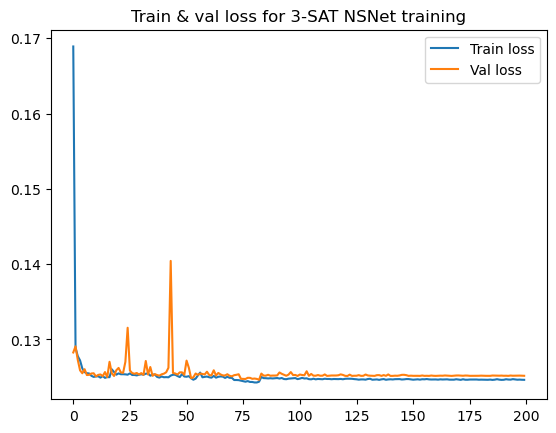

In [13]:
from matplotlib import pyplot as plt

plt.plot(epochs, train_loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.legend()
# plt.yscale("log")
plt.title("Train & val loss for 3-SAT NSNet training")
plt.show()

### Model evaluation procedure

#### 1. Marginals inference

```bash
export MODEL_PATH="src/runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt"
python src/run_model.py SATSolving/3-sat/test_hard --checkpoint $MODEL_PATH --model NSNet --n_rounds 10 --batch_size 32
```

We use the trained model to infer marginals for each `.cnf` in the test set. The inference process produces an `05095_NSNet.out` file for each corresponding `05095.cnf`.

Example of `.out` file content (each variable receives an initial assignment):

```
0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 
```

The assignment of each variable is the result of thresholding over the marginals output from the model. Probability above `0.5` results in assignment of `1`, and `0` if the probability is below or equal to `0.5`:

```python
    for data in test_loader:
        data = data.to(opts.device)
        with torch.no_grad():
            v_probs = model(data)
            v_assigns = (v_probs > 0.5).float()       # <--- marginals to variable assignmenet
            assignments = v_assigns[:, 0]
            ...
```

#### 2. Run Sparrow solver using initial assignment inferred by model

```bash
# Max 100 flips with NSNet initial assignment
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 100 --n_process 8 --trial 0 --model NSNet
Total: 10000, Solved: 3622, Ratio: 0.362, Average number of flips: 14.6.
Solving Time: 8.264018

# Max 100 flips Sparrow only
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 100 --n_process 8 --trial 9
Total: 10000, Solved: 785, Ratio: 0.079, Average number of flips: 56.8.
Solving Time: 7.642749

# Max 500 flips with NSNet
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 500 --n_process 8 --trial 9 --model NSNet
Total: 10000, Solved: 4404, Ratio: 0.440, Average number of flips: 63.1.
Solving Time: 8.319189

# Max 1000 flips with NSNet
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 1000 --n_process 8 --trial 9 --model NSNet
Total: 10000, Solved: 5072, Ratio: 0.507, Average number of flips: 150.5.
Solving Time: 8.309806

# Max 1000 flips Sparrow only
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 1000 --n_process 8 --trial 9
Total: 10000, Solved: 3460, Ratio: 0.346, Average number of flips: 351.7.
Solving Time: 7.905121

# Max 5000 flips with NSNet
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 5000 --n_process 8 --trial 9 --model NSNet
Total: 10000, Solved: 6782, Ratio: 0.678, Average number of flips: 741.9.
Solving Time: 8.381277

# Max 500 flips Sparrow only
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 5000 --n_process 8 --trial 9
Total: 10000, Solved: 5614, Ratio: 0.561, Average number of flips: 1124.1.
Solving Time: 8.196821

# Max 100_000 flips with NSNet
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 100000 --n_process 8 --trial 9 --model NSNet
Total: 10000, Solved: 8154, Ratio: 0.815, Average number of flips: 4330.7.
Solving Time: 9.882059

# Max 100_000 flips Sparrow only
python src/test_sat_solver.py SATSolving/3-sat/test_hard --solver Sparrow --max_flips 100000 --n_process 8 --trial 9
Total: 10000, Solved: 7080, Ratio: 0.708, Average number of flips: 5553.6.
Solving Time: 9.971548
```

### Helper functions

In [1]:
import os
os.chdir("/opt/files/maio2022/SAT/NSNet/src")
!pwd

/opt/files/maio2022/SAT/NSNet/src


In [2]:
from pathlib import Path
import pickle
import time
from typing import Literal

from rich import print as printr

from matplotlib import pyplot as plt

from test_sat_solver import evaluate_sat_solver
from run_model import run_model
from utils.options import ArgOpts

In [3]:
# Plot number of variables & clauses of CNFs in test folder

def count_vars_clauses(test_dir_path: str) -> tuple[list[int], list[int]]:
    """
    Counts number of variables and number of clauses in CNFs inside given dir path
    """
    test_path = Path(test_dir_path)
    num_vars, num_clauses = [], []
    for fpath in test_path.glob("*.cnf"):
        with open(fpath, "r") as f:
            for line in f.readlines():
                *_, nvars, nclauses = line.strip().split()   # "p cnf 44 192"
                if _[0] == "c":
                    continue
                nvars, nclauses = int(nvars), int(nclauses)
                break
        num_vars.append(nvars)
        num_clauses.append(nclauses)
    return num_vars, num_clauses

In [4]:
def run_sat_solver(opts):
    all_results, seconds = evaluate_sat_solver(opts)
    total = len(all_results)
    count = 0
    avg_flips = 0
    for result in all_results:
        complete, assignment, num_flips, t_ = result
        if complete:
            count += 1
            avg_flips += num_flips
    ratio = count / total
    if count > 0:
        avg_flips /= count
    return all_results, total, count, ratio, avg_flips, seconds


# Test
# all_results, total, count, ratio, avg_flips, seconds = run_sat_solver(opts_eval)
# print('Total: %d, Solved: %d, Ratio: %.3f, Average number of flips: %.1f., in %.3f' % (total, count, ratio, avg_flips, seconds))

In [5]:
def run_eval_multi_flips(
    opts: ArgOpts,
    model_name: Literal["NSNet", None] = "NSNet",   # None to run Sparrow solver only
    pickle_fname: str = "data_maxflip_sr_nsnet.pkl",
    all_max_flips: tuple[int, ...] = (100, 500, 1_000, 5_000, 10_000, 50_000, 100_000, 500_000),
):
    counts, ratios, all_avg_flips, all_seconds, lengths_solved = [], [], [], [], []
    start = time.perf_counter()
    opts.set("model", model_name)
    print(f"Running eval with {model_name if model_name else 'Sparrow-only'}")
    print(f"    {pickle_fname=}\n    {opts.test_dir=}")
    for max_flips in all_max_flips:
        opts.set("max_flips", max_flips)
        print("Running with", max_flips, "max flips.", end=" ")
        all_results, total, count, ratio, avg_flips, seconds = run_sat_solver(opts)
        lengths_solved.append([len(res[1]) for res in all_results if res[0] == 1])
        counts.append(count)
        ratios.append(ratio)
        all_avg_flips.append(avg_flips)
        all_seconds.append(seconds)
        stop = time.perf_counter()
        print(f"Done in {stop - start:.2f} sec.")
        start = stop
    # Save data to pickle
    if pickle_fname:
        with open(pickle_fname, "wb") as f:
            pickle.dump(
                (
                    counts, ratios, all_avg_flips,
                    all_seconds, lengths_solved, all_max_flips,
                    len(all_results),   # num_cnfs
                    opts.test_dir,      # cnfs_dir
                ),
                f
            )
    return (
        counts, ratios, all_avg_flips,
        all_seconds, lengths_solved, all_max_flips,
        len(all_results),
        opts.test_dir)

In [6]:
def make_plots_from_pickle(
    pickle_fname_nsnet: str = "data_maxflip_sr_nsnet.pkl",
    pickle_fname_other: str = "data_maxflip_sr_sparrow.pkl",
    label_nsnet: str = "with NSNet",
    label_other: str = "Sparrow-only",
):
    """  """
    # Load nsnet data from pickle
    with open(pickle_fname_nsnet, "rb") as f:
        (
            counts, ratios, all_avg_flips, all_seconds,
            lengths_solved, all_max_flips, num_cnfs, cnfs_dir
        ) = pickle.load(f)
    # Load sparrow-only data from pickle
    with open(pickle_fname_other, "rb") as f:
        (
            s_counts, s_ratios, s_all_avg_flips, s_all_seconds,
            s_lengths_solved, s_all_max_flips, s_num_cnfs, s_cnfs_dir
        ) = pickle.load(f)
    assert num_cnfs == s_num_cnfs, f"{num_cnfs=} != {s_num_cnfs=}"
    assert cnfs_dir == s_cnfs_dir, f"{cnfs_dir=} {s_cnfs_dir=}"
    num_vars, num_clauses = count_vars_clauses(cnfs_dir)
    # --- --- --- --- --- ---
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), )
    # plt.subplots_adjust(hspace=0.5)

    ax1.plot(s_all_max_flips, s_ratios, label=label_other)
    ax1.plot(all_max_flips, ratios, label=label_nsnet)
    ax1.legend()
    ax1.set_xticks(all_max_flips)
    ax1.set_title("Solve ratio vs num flips")
    ax1.set_xlabel("Max flips")
    ax1.set_ylabel(f"Solve ratio (total cnfs={num_cnfs})")
    ax1.set_xscale("log")

    ax2.plot(s_all_max_flips, s_all_avg_flips, label=label_other)
    ax2.plot(all_max_flips, all_avg_flips, label=label_nsnet)
    ax2.set_xticks(all_max_flips)
    ax2.legend()
    ax2.set_title("Avg. flips vs num flips")
    ax2.set_xlabel("Max flips")
    ax2.set_ylabel(f"Avg. num of flips")
    ax2.set_xscale("log")
    ax2.set_yscale("log")

    ax3.plot(s_all_max_flips, s_all_seconds, label=label_other)
    ax3.plot(all_max_flips, all_seconds, label=label_nsnet)
    ax3.set_xticks(all_max_flips)
    ax3.legend()
    ax3.set_title("Time (seconds) vs num flips")
    ax3.set_xlabel("Max flips")
    ax3.set_ylabel(f"Seconds")
    ax3.set_xscale("log")
    plt.show()

    # Plot histograms
    fig, axes = plt.subplots(4, 2, figsize=(12, 12), )
    plt.subplots_adjust(hspace=0.5)
    for i, (ax_left, ax_right) in enumerate(axes):
        ix_left = i * 2
        ix_right = ix_left + 1
        ax_left.hist(num_vars, bins=50, alpha=0.3, label="Number of vars in test dir")
        ax_left.hist(s_lengths_solved[ix_left], bins=50, alpha=0.3, label=label_other)
        ax_left.hist(lengths_solved[ix_left], bins=50, alpha=0.3, label=label_nsnet)
        ax_left.legend(loc="upper left")
        ax_left.set_title(f"Lengths of solved instances at max num flips={all_max_flips[ix_left]}")
        ax_right.hist(s_lengths_solved[ix_right], bins=50, alpha=0.3, label=label_other)
        ax_right.hist(lengths_solved[ix_right], bins=50, alpha=0.3, label=label_nsnet)
        ax_right.legend(loc="upper left")
        ax_right.set_title(f"Lengths of solved instances at max num flips={all_max_flips[ix_right]}")
    plt.show()

In [7]:
def plot_num_clauses_vars(num_vars: list[int], num_clauses: list[int]):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), )
    ax1.hist(num_vars, bins=50, alpha=0.6, label="Number of variables")
    ax1.set_xlabel("Number of variables")
    ax1.legend(loc="lower right")
    ax1.set_title("Number of variables in instances inside test dir")
    ax2.hist(num_clauses, bins=50, alpha=0.6, label="Number of clauses")
    ax2.scatter(num_clauses, num_vars, label="Num clauses vs num vars", alpha=0.3, color="red", s=1)
    ax2.set_xlabel("Number of clauses")
    ax2.legend(loc="lower right")
    ax2.set_title("Number of clauses in instances inside test dir")
    plt.show()

### Base params for eval & inference

In [8]:
opts_eval = ArgOpts(
    test_dir="../SATSolving/3-sat/test_hard",    # *** between 40 and 200 variables
    solver="Sparrow",
    max_flips=100,
    timeout=5000,
    n_process=8,
    trial=0,
    model="NSNet",       # ---> out file with fname: "05095_NSNet.out"
    out_name=None,       # .out filename (adds string to "05095_NSNet_[here].out" )
)

In [9]:
opts_infer = ArgOpts(
    # Directory with testing data
    test_dir="../SATSolving/3-sat/test_hard",
    # Checkpoint to be tested
    checkpoint="runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt",
    num_workers=8,      # Number of workers for data loading
    batch_size=32,
    seed=0,             # Random seed
    model="NSNet",      # Model to be tested
    # Add argument that adds name to .out filename
    # Name to be added to .out filename
    out_name=None,
)
opts_infer.add_model_options()

### SATLIB

- `SATLIB/RND3SAT/uf250-1065` (250 vars, 1065 clauses)

ArgOpts(batch_size=32, dim=64, device=device(type='cpu'), 
checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', task='sat-solving', activation='relu', 
n_mlp_layers=3, model='NSNet', seed=0, out_name='uf250_with_3sat', n_rounds=10, 
test_dir='../SATSolving/SATLIB/RND3SAT/uf250-1065', num_workers=8)

ArgOpts(n_process=8, trial=0, timeout=5000, model=None, max_flips=500000, out_name='uf250_with_3sat', 
test_dir='../SATSolving/SATLIB/RND3SAT/uf250-1065', solver='Sparrow')

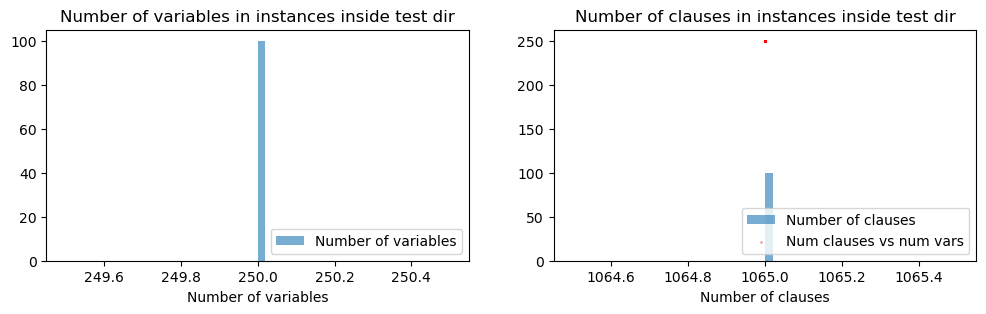

ArgOpts(batch_size=32, dim=64, device=device(type='cpu'), checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', task='sat-solving', activation='relu', n_mlp_layers=3, model='NSNet', seed=0, out_name='uf250_with_3sat', n_rounds=10, test_dir='../SATSolving/SATLIB/RND3SAT/uf250-1065', num_workers=8)
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Running... (saving assignment to `[cnf filename]_NSNet_uf250_with_3sat.out`)


  0%|                                                                                                             | 0/4 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.s

Running Time: 38.143074
Running eval with NSNet
    pickle_fname='data_maxflip_uf250_with_3sat_nsnet.pkl'
    opts.test_dir='../SATSolving/SATLIB/RND3SAT/uf250-1065'
Running with 100 max flips. 

Done in 0.30 sec.
Running with 500 max flips. Done in 0.23 sec.
Running with 1000 max flips. Done in 0.25 sec.
Running with 5000 max flips. Done in 0.25 sec.
Running with 10000 max flips. Done in 0.24 sec.
Running with 50000 max flips. Done in 0.30 sec.
Running with 100000 max flips. Done in 0.31 sec.
Running with 500000 max flips. Done in 0.58 sec.
Running eval with Sparrow-only
    pickle_fname='data_maxflip_sparrow_uf250.pkl'
    opts.test_dir='../SATSolving/SATLIB/RND3SAT/uf250-1065'
Running with 100 max flips. Done in 0.22 sec.
Running with 500 max flips. Done in 0.23 sec.
Running with 1000 max flips. Done in 0.24 sec.
Running with 5000 max flips. Done in 0.23 sec.
Running with 10000 max flips. Done in 0.25 sec.
Running with 50000 max flips. Done in 0.34 sec.
Running with 100000 max flips. Done in 0.38 sec.
Running with 500000 max flips. Done in 0.65 sec.


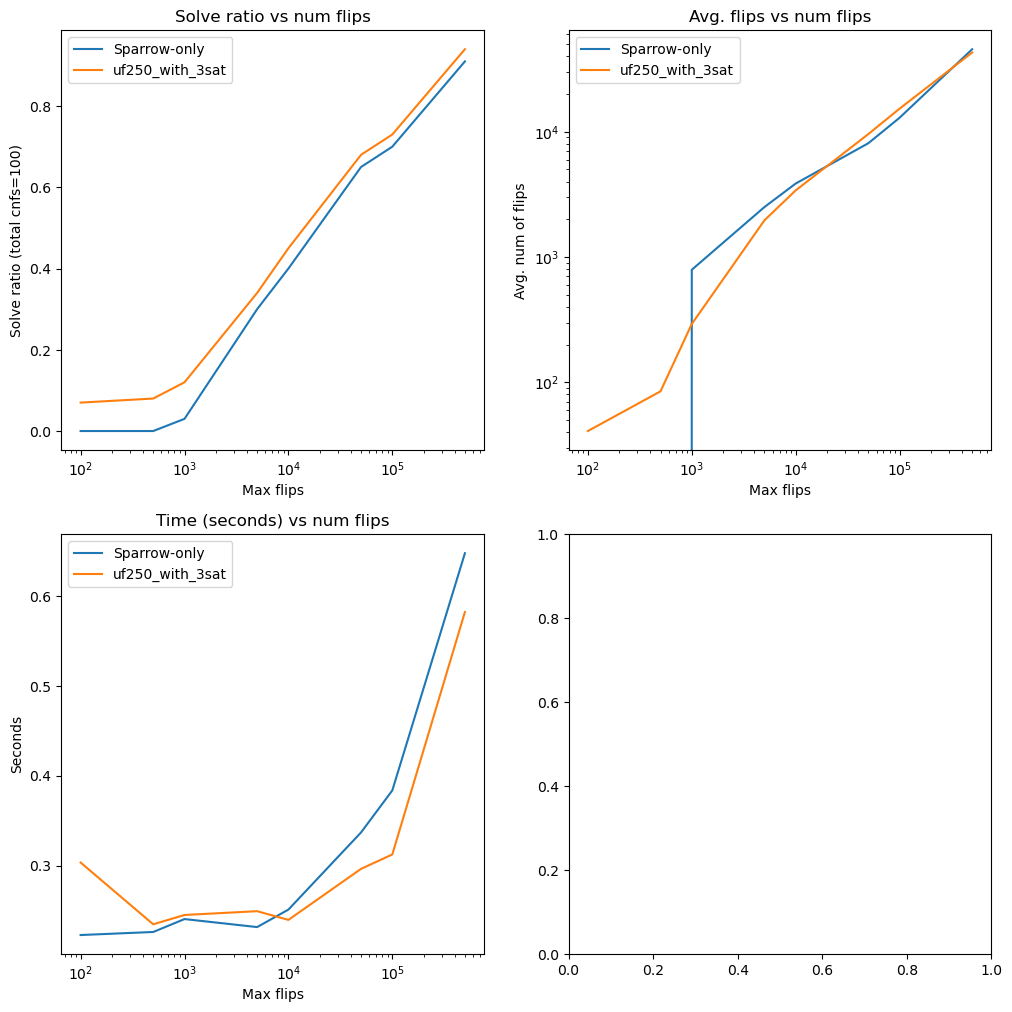

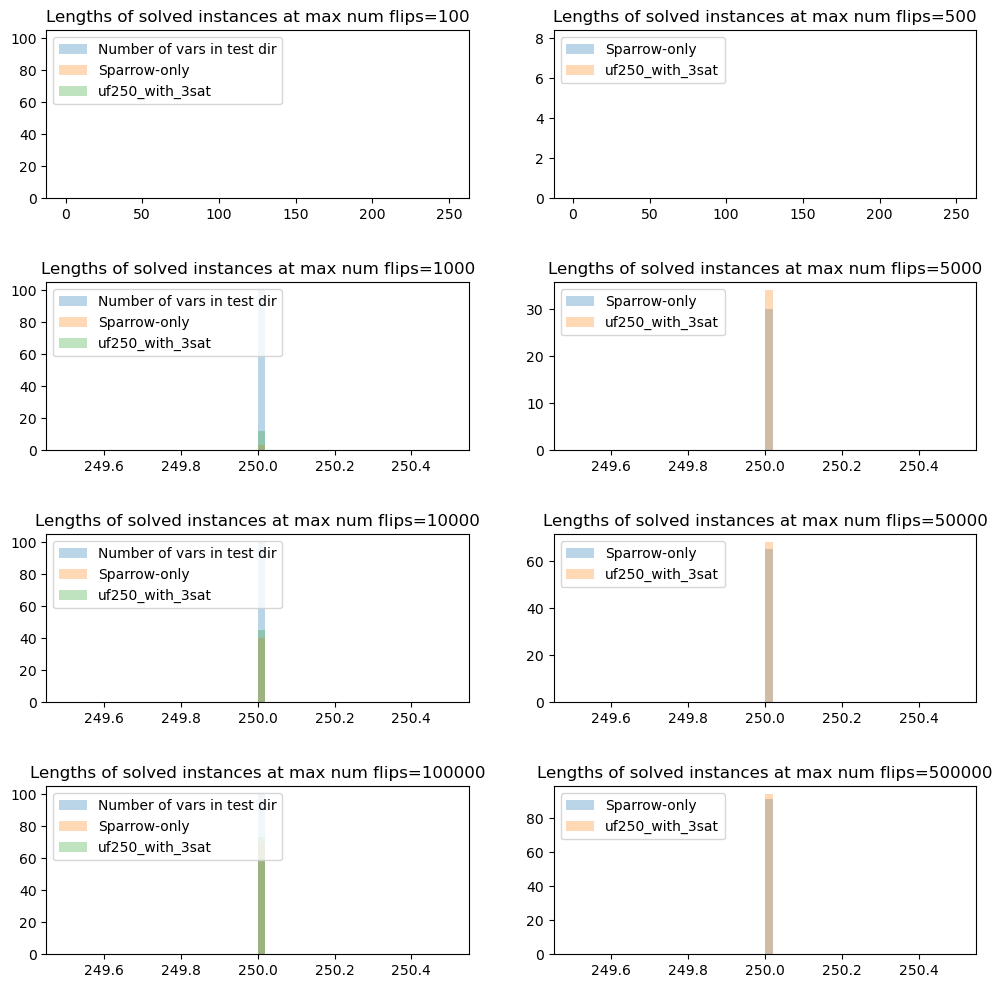

In [15]:
opts_infer.test_dir = "../SATSolving/SATLIB/RND3SAT/uf250-1065"
opts_infer.checkpoint = "runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt"
opts_infer.out_name = "uf250_with_3sat"
printr(opts_infer)

opts_eval.test_dir = opts_infer.test_dir
opts_eval.out_name = opts_infer.out_name       # .out pre-assignment file
printr(opts_eval)

num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

t = run_model(opts_infer, verbose=True)

# Solve SAT with NSNet and Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
)

# Solve SAT with Sparrow-only
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name=None,
    pickle_fname=f"data_maxflip_sparrow_uf250.pkl",
)

# Plot results - COMPARE WITH initial results using SR checkpoint
make_plots_from_pickle(
    pickle_fname_other="data_maxflip_sparrow_uf250.pkl",
    pickle_fname_nsnet=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
    label_nsnet=opts_infer.out_name,
    label_other="Sparrow-only"
)

### SATLIB

- `SATLIB/RND3SAT/uf125-538`

ArgOpts(batch_size=32, dim=64, device=device(type='cpu'), 
checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', task='sat-solving', activation='relu', 
n_mlp_layers=3, model='NSNet', seed=0, out_name='uf125_with_3sat', n_rounds=10, 
test_dir='../SATSolving/SATLIB/RND3SAT/uf125-538', num_workers=8)

ArgOpts(n_process=8, trial=0, timeout=5000, model=None, max_flips=500000, out_name='uf125_with_3sat', 
test_dir='../SATSolving/SATLIB/RND3SAT/uf125-538', solver='Sparrow')

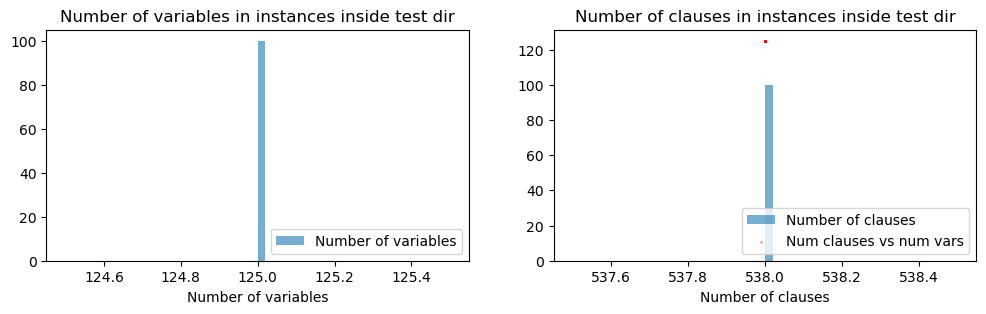

ArgOpts(batch_size=32, dim=64, device=device(type='cpu'), checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', task='sat-solving', activation='relu', n_mlp_layers=3, model='NSNet', seed=0, out_name='uf125_with_3sat', n_rounds=10, test_dir='../SATSolving/SATLIB/RND3SAT/uf125-538', num_workers=8)


Processing...
Done!


Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Running... (saving assignment to `[cnf filename]_NSNet_uf125_with_3sat.out`)


  0%|                                                                                                             | 0/4 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.s

Running Time: 34.683963
Running eval with NSNet
    pickle_fname='data_maxflip_uf125_with_3sat_nsnet.pkl'
    opts.test_dir='../SATSolving/SATLIB/RND3SAT/uf125-538'
Running with 100 max flips. 

Done in 0.26 sec.
Running with 500 max flips. Done in 0.22 sec.
Running with 1000 max flips. Done in 0.23 sec.
Running with 5000 max flips. Done in 0.24 sec.
Running with 10000 max flips. Done in 0.23 sec.
Running with 50000 max flips. Done in 0.28 sec.
Running with 100000 max flips. Done in 0.29 sec.
Running with 500000 max flips. Done in 0.34 sec.
Running eval with Sparrow-only
    pickle_fname='data_maxflip_sparrow_uf125.pkl'
    opts.test_dir='../SATSolving/SATLIB/RND3SAT/uf125-538'
Running with 100 max flips. Done in 0.22 sec.
Running with 500 max flips. Done in 0.28 sec.
Running with 1000 max flips. Done in 0.31 sec.
Running with 5000 max flips. Done in 0.27 sec.
Running with 10000 max flips. Done in 0.24 sec.
Running with 50000 max flips. Done in 0.24 sec.
Running with 100000 max flips. Done in 0.26 sec.
Running with 500000 max flips. Done in 0.25 sec.


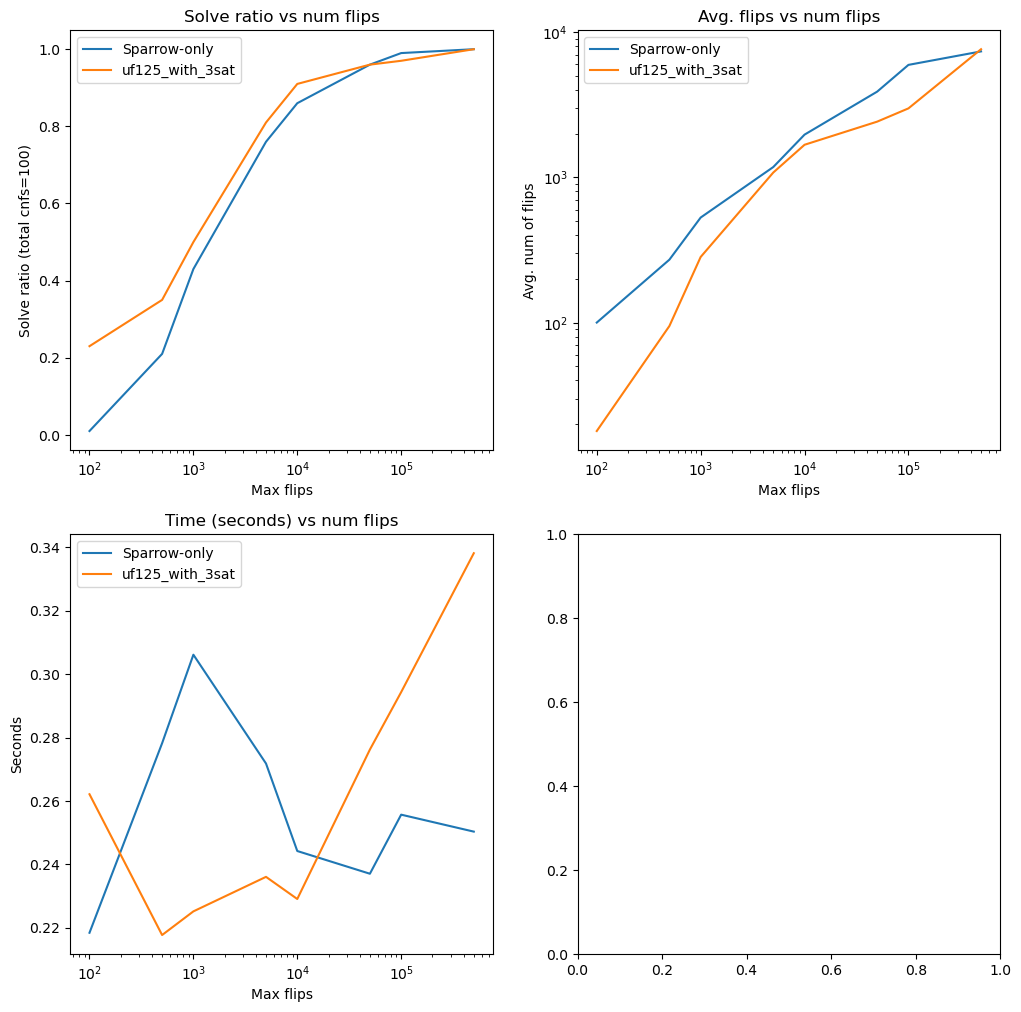

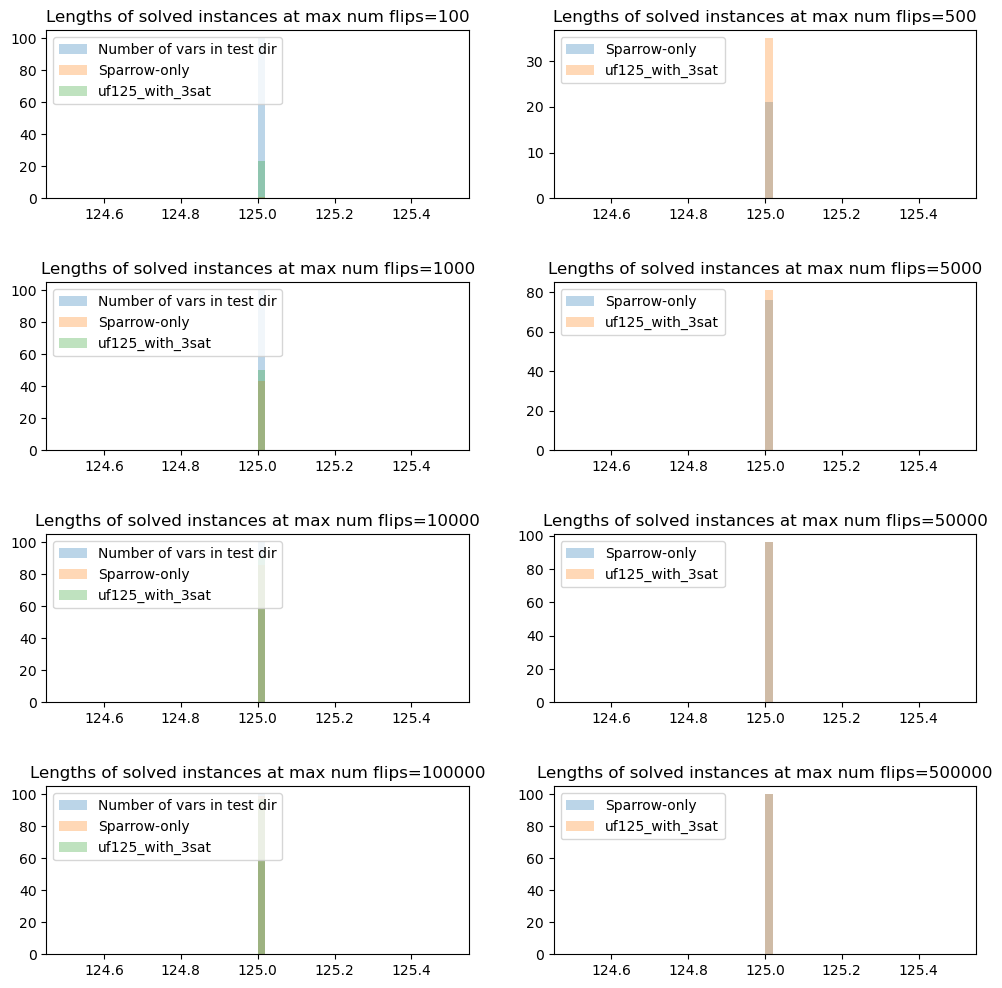

In [14]:
opts_infer.test_dir = "../SATSolving/SATLIB/RND3SAT/uf125-538"
opts_infer.checkpoint = "runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt"
opts_infer.out_name = "uf125_with_3sat"
printr(opts_infer)

opts_eval.test_dir = opts_infer.test_dir
opts_eval.out_name = opts_infer.out_name       # .out pre-assignment file
printr(opts_eval)

num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

t = run_model(opts_infer, verbose=True)

# Solve SAT with NSNet and Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
)

# Solve SAT with Sparrow-only
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name=None,
    pickle_fname=f"data_maxflip_sparrow_uf125.pkl",
)

# Plot results - COMPARE WITH initial results using SR checkpoint
make_plots_from_pickle(
    pickle_fname_other="data_maxflip_sparrow_uf125.pkl",
    pickle_fname_nsnet=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
    label_nsnet=opts_infer.out_name,
    label_other="Sparrow-only"
)

### SATLIB

- `SATLIB/RND3SAT/uf20-91`

ArgOpts(batch_size=32, dim=64, device=device(type='cpu'), 
checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', task='sat-solving', activation='relu', 
n_mlp_layers=3, model='NSNet', seed=0, out_name='uf20_with_3sat', n_rounds=10, 
test_dir='../SATSolving/SATLIB/RND3SAT/uf20-91', num_workers=8)

ArgOpts(n_process=8, trial=0, timeout=5000, model=None, max_flips=500000, out_name='uf20_with_3sat', 
test_dir='../SATSolving/SATLIB/RND3SAT/uf20-91', solver='Sparrow')

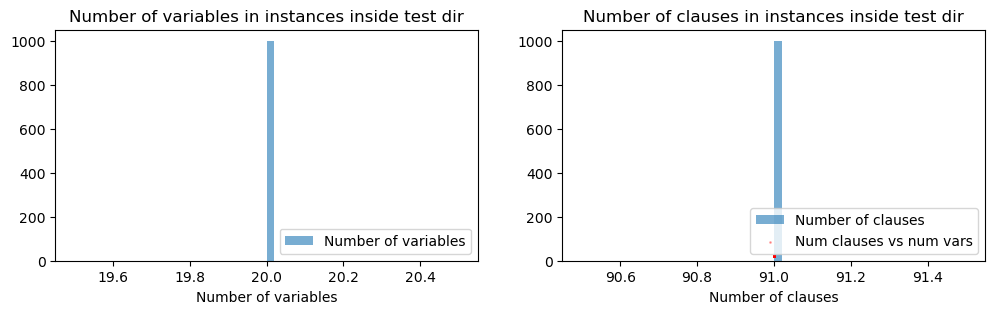

ArgOpts(batch_size=32, dim=64, device=device(type='cpu'), checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', task='sat-solving', activation='relu', n_mlp_layers=3, model='NSNet', seed=0, out_name='uf20_with_3sat', n_rounds=10, test_dir='../SATSolving/SATLIB/RND3SAT/uf20-91', num_workers=8)


Processing...
Done!


Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Running... (saving assignment to `[cnf filename]_NSNet_uf20_with_3sat.out`)


  0%|                                                                                                            | 0/32 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.s

Running Time: 63.966927
Running eval with NSNet
    pickle_fname='data_maxflip_uf20_with_3sat_nsnet.pkl'
    opts.test_dir='../SATSolving/SATLIB/RND3SAT/uf20-91'
Running with 100 max flips. 

Done in 0.95 sec.
Running with 500 max flips. Done in 0.83 sec.
Running with 1000 max flips. Done in 0.96 sec.
Running with 5000 max flips. Done in 0.87 sec.
Running with 10000 max flips. Done in 0.83 sec.
Running with 50000 max flips. Done in 0.81 sec.
Running with 100000 max flips. Done in 0.86 sec.
Running with 500000 max flips. Done in 0.82 sec.
Running eval with Sparrow-only
    pickle_fname='data_maxflip_sparrow_uf20.pkl'
    opts.test_dir='../SATSolving/SATLIB/RND3SAT/uf20-91'
Running with 100 max flips. Done in 0.82 sec.
Running with 500 max flips. Done in 0.78 sec.
Running with 1000 max flips. Done in 0.82 sec.
Running with 5000 max flips. Done in 0.81 sec.
Running with 10000 max flips. Done in 0.81 sec.
Running with 50000 max flips. Done in 0.80 sec.
Running with 100000 max flips. Done in 0.80 sec.
Running with 500000 max flips. Done in 0.80 sec.


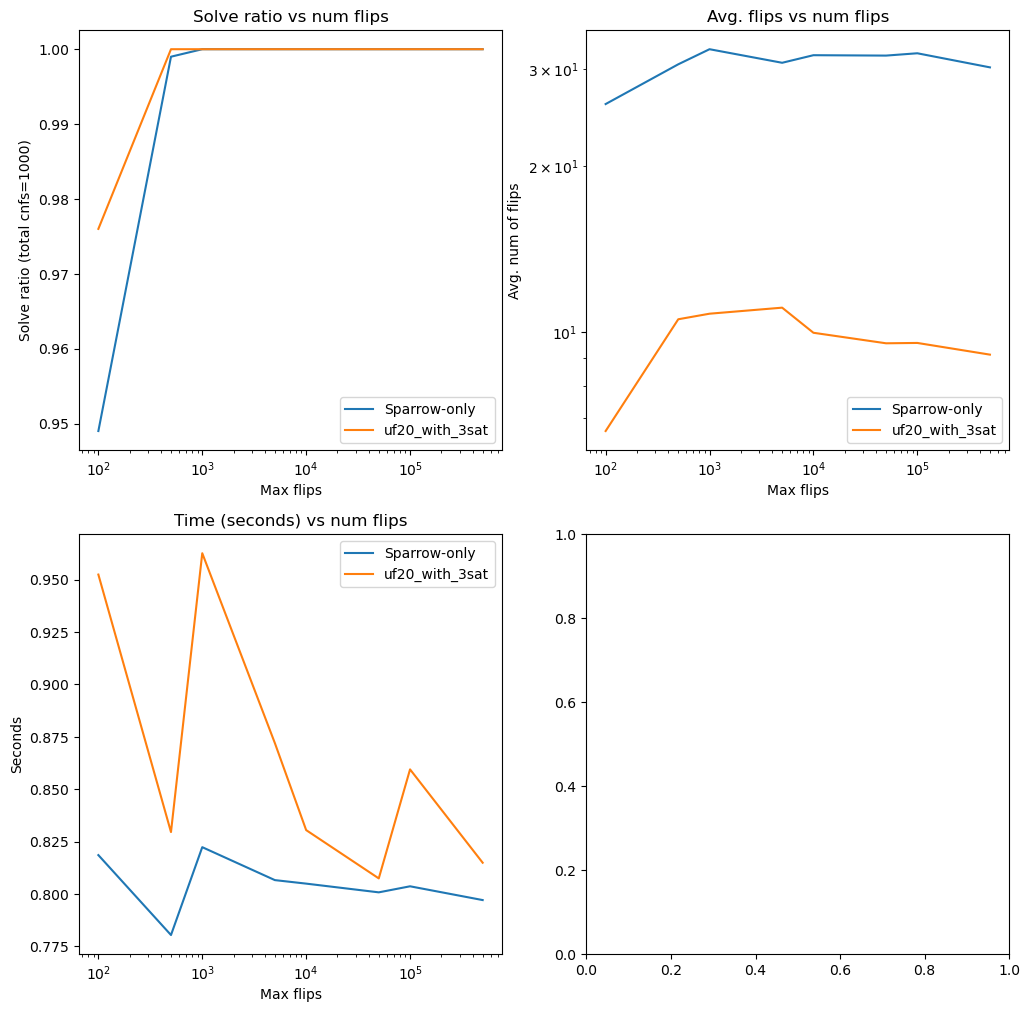

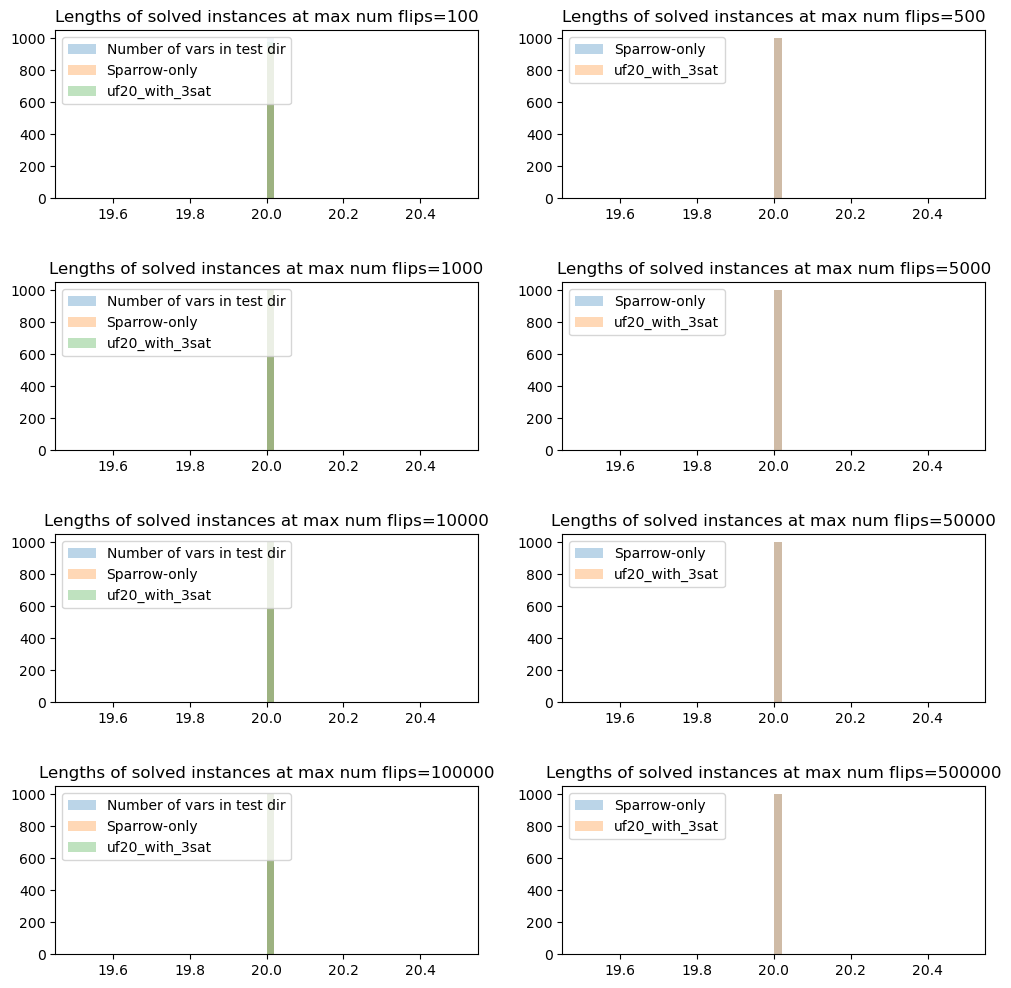

In [16]:
opts_infer.test_dir = "../SATSolving/SATLIB/RND3SAT/uf20-91"
opts_infer.checkpoint = "runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt"
opts_infer.out_name = "uf20_with_3sat"
printr(opts_infer)

opts_eval.test_dir = opts_infer.test_dir
opts_eval.out_name = opts_infer.out_name       # .out pre-assignment file
printr(opts_eval)

num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

t = run_model(opts_infer, verbose=True)

# Solve SAT with NSNet and Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
)

# Solve SAT with Sparrow-only
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name=None,
    pickle_fname=f"data_maxflip_sparrow_uf20.pkl",
)

# Plot results - COMPARE WITH initial results using SR checkpoint
make_plots_from_pickle(
    pickle_fname_other="data_maxflip_sparrow_uf20.pkl",
    pickle_fname_nsnet=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
    label_nsnet=opts_infer.out_name,
    label_other="Sparrow-only"
)

### Inference - `SR` data with `3-SAT` trained model

In [10]:
opts_infer.test_dir = "../SATSolving/sr/test_hard"
opts_infer.checkpoint = "runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt"
opts_infer.out_name = "sr_with_3sat"
printr(opts_infer)

In [11]:
t = run_model(opts_infer, verbose=True)

ArgOpts(seed=0, dim=64, num_workers=8, checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', model='NSNet', task='sat-solving', batch_size=32, device=device(type='cpu'), n_mlp_layers=3, out_name='sr_with_3sat', test_dir='../SATSolving/sr/test_hard', n_rounds=10, activation='relu')
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Running... (saving assignment to `[cnf filename]_NSNet_sr_with_3sat.out`)


/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.p

Running Time: 1354.151863


ArgOpts(max_flips=100, model='NSNet', n_process=8, trial=0, out_name='sr_with_3sat', 
test_dir='../SATSolving/sr/test_hard', timeout=5000, solver='Sparrow')

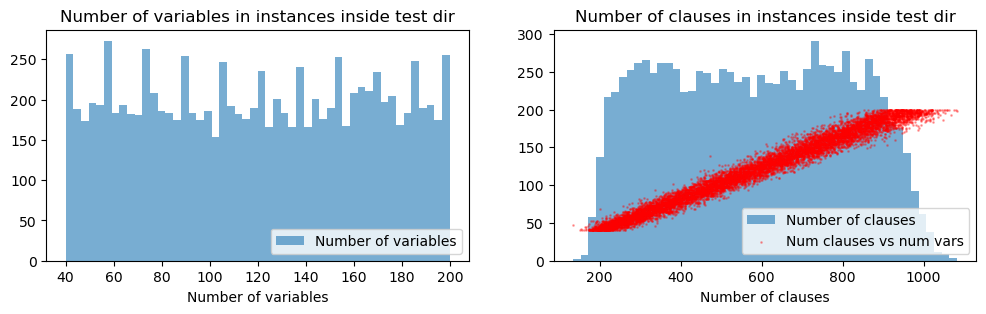

Running eval with NSNet
    pickle_fname='data_maxflip_sr_with_3sat_nsnet.pkl'
    opts.test_dir='../SATSolving/sr/test_hard'
Running with 100 max flips. Done in 7.49 sec.
Running with 500 max flips. Done in 7.48 sec.
Running with 1000 max flips. Done in 7.80 sec.
Running with 5000 max flips. Done in 8.08 sec.
Running with 10000 max flips. Done in 8.11 sec.
Running with 50000 max flips. Done in 9.02 sec.
Running with 100000 max flips. Done in 9.25 sec.
Running with 500000 max flips. Done in 10.81 sec.


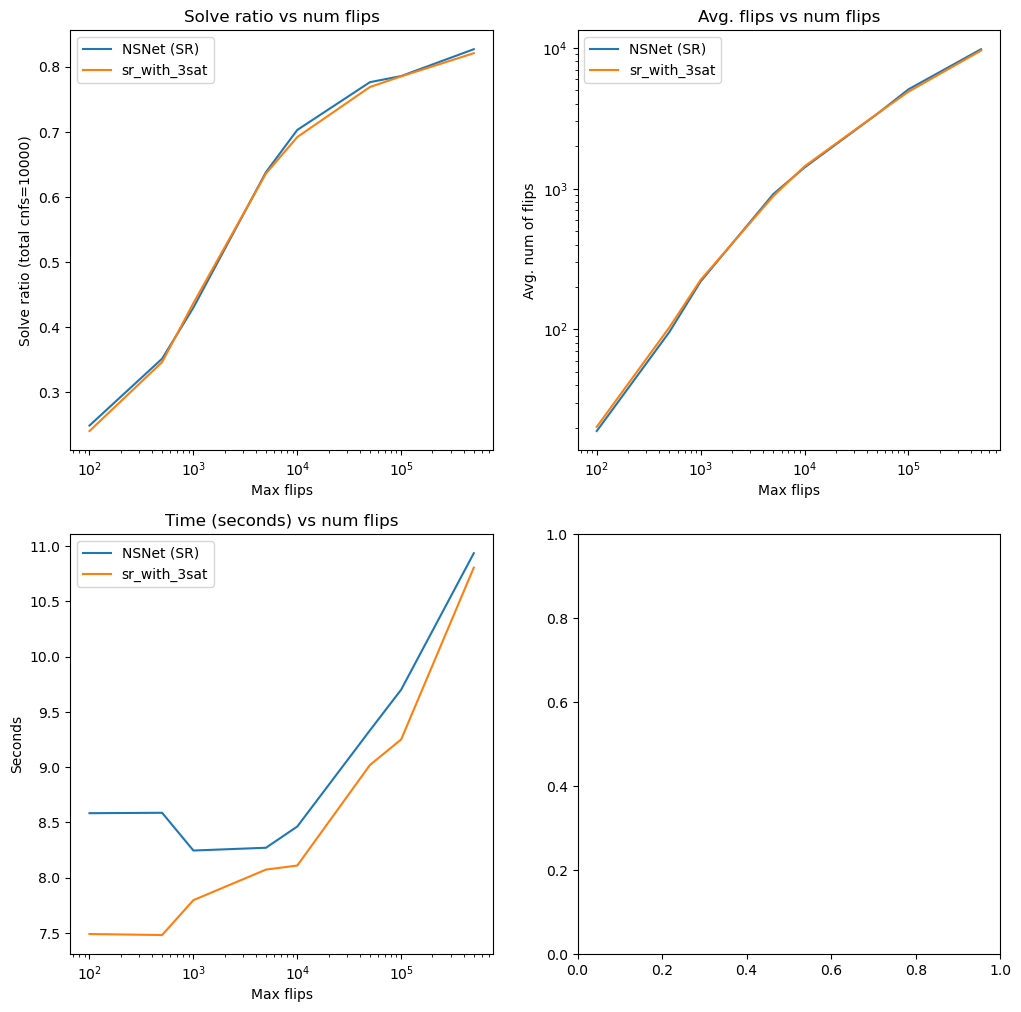

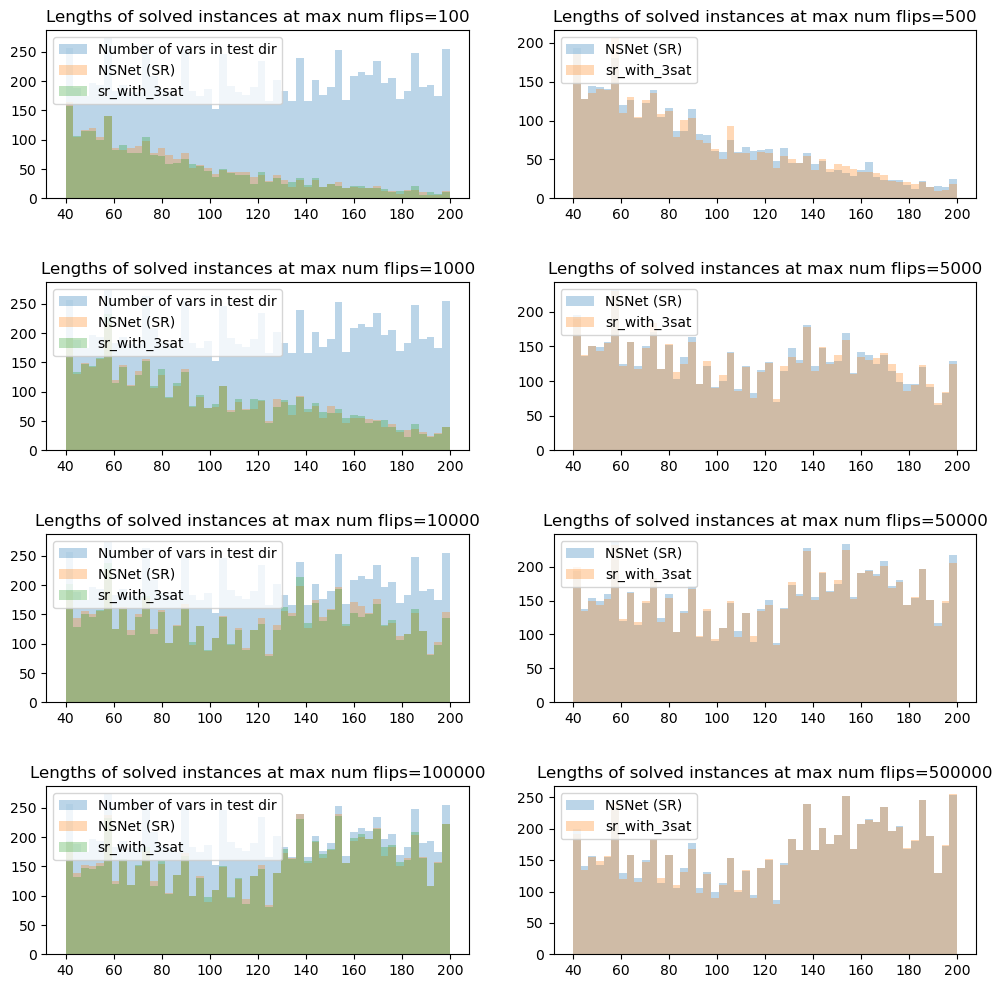

In [13]:
opts_eval.test_dir = opts_infer.test_dir
opts_eval.out_name = opts_infer.out_name       # .out pre-assignment file
printr(opts_eval)

num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

# Solve SAT with NSNet and Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
)
# Plot results - COMPARE WITH initial results using SR checkpoint
make_plots_from_pickle(
    pickle_fname_other="data_maxflip_sr_nsnet.pkl",
    pickle_fname_nsnet=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
    label_nsnet=opts_infer.out_name,
    label_other="NSNet (SR)"
)


### Inference - `CA` data with `3-SAT` trained model

In [10]:
# CA with base model (trained on CA)
opts_infer.test_dir = "../SATSolving/ca/test_hard"
opts_infer.checkpoint = "runs/nsnet_base/checkpoints/model_best.pt"
opts_infer.out_name = None
printr(opts_infer)

t = run_model(opts_infer, verbose=True)

ArgOpts(n_mlp_layers=3, activation='relu', task='sat-solving', batch_size=32, model='NSNet', out_name=None, dim=64,
test_dir='../SATSolving/ca/test_hard', seed=0, n_rounds=10, checkpoint='runs/nsnet_base/checkpoints/model_best.pt',
num_workers=8)

ArgOpts(n_mlp_layers=3, activation='relu', task='sat-solving', device=device(type='cpu'), batch_size=32, model='NSNet', out_name=None, dim=64, test_dir='../SATSolving/ca/test_hard', seed=0, n_rounds=10, checkpoint='runs/nsnet_base/checkpoints/model_best.pt', num_workers=8)
Loading model checkpoint from runs/nsnet_base/checkpoints/model_best.pt..
Running... (saving assignment to `[cnf filename]_NSNet.out`)


  0%|                                                                                                           | 0/313 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.s

Running Time: 560.713764


In [11]:
# CA with 3-SAT trained model
opts_infer.test_dir = "../SATSolving/ca/test_hard"
opts_infer.checkpoint = "runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt"
opts_infer.out_name = "ca_with_3sat"
printr(opts_infer)

t = run_model(opts_infer, verbose=True)

ArgOpts(n_mlp_layers=3, activation='relu', task='sat-solving', device=device(type='cpu'), batch_size=32, 
model='NSNet', out_name='ca_with_3sat', dim=64, test_dir='../SATSolving/ca/test_hard', seed=0, n_rounds=10, 
checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8)

ArgOpts(n_mlp_layers=3, activation='relu', task='sat-solving', device=device(type='cpu'), batch_size=32, model='NSNet', out_name='ca_with_3sat', dim=64, test_dir='../SATSolving/ca/test_hard', seed=0, n_rounds=10, checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8)
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Running... (saving assignment to `[cnf filename]_NSNet_ca_with_3sat.out`)


  0%|                                                                                                           | 0/313 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/opt/homebrew/Caskroom/miniconda/base/envs/spacy/lib/python3.10/site-packages/torch_geometric/data/collate.py:145: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.s

Running Time: 562.634276


ArgOpts(max_flips=100, solver='Sparrow', model='NSNet', trial=0, n_process=8, out_name='ca_with_3sat', 
test_dir='../SATSolving/ca/test_hard', timeout=5000)

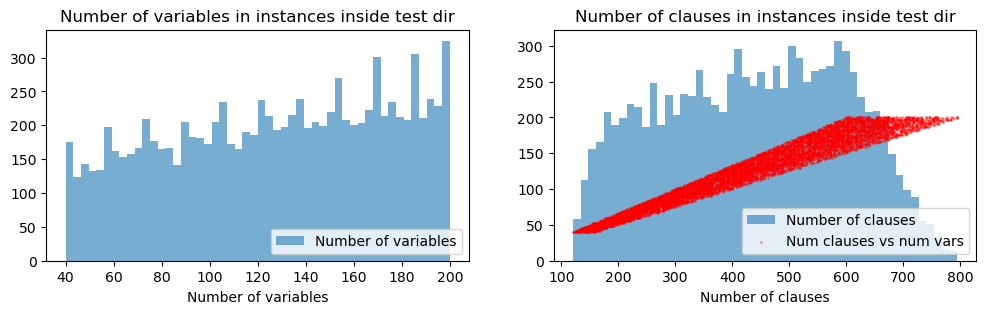

Running eval with NSNet
    pickle_fname='data_maxflip_ca_nsnet.pkl'
    opts.test_dir='../SATSolving/ca/test_hard'
Running with 100 max flips. Done in 8.61 sec.
Running with 500 max flips. Done in 7.86 sec.
Running with 1000 max flips. Done in 7.69 sec.
Running with 5000 max flips. Done in 7.54 sec.
Running with 10000 max flips. Done in 7.60 sec.
Running with 50000 max flips. Done in 7.47 sec.
Running with 100000 max flips. Done in 7.54 sec.
Running with 500000 max flips. Done in 7.41 sec.
Running eval with NSNet
    pickle_fname='data_maxflip_ca_with_3sat_nsnet.pkl'
    opts.test_dir='../SATSolving/ca/test_hard'
Running with 100 max flips. Done in 7.44 sec.
Running with 500 max flips. Done in 7.70 sec.
Running with 1000 max flips. Done in 8.11 sec.
Running with 5000 max flips. Done in 8.14 sec.
Running with 10000 max flips. Done in 7.74 sec.
Running with 50000 max flips. Done in 7.55 sec.
Running with 100000 max flips. Done in 7.53 sec.
Running with 500000 max flips. Done in 7.63 sec

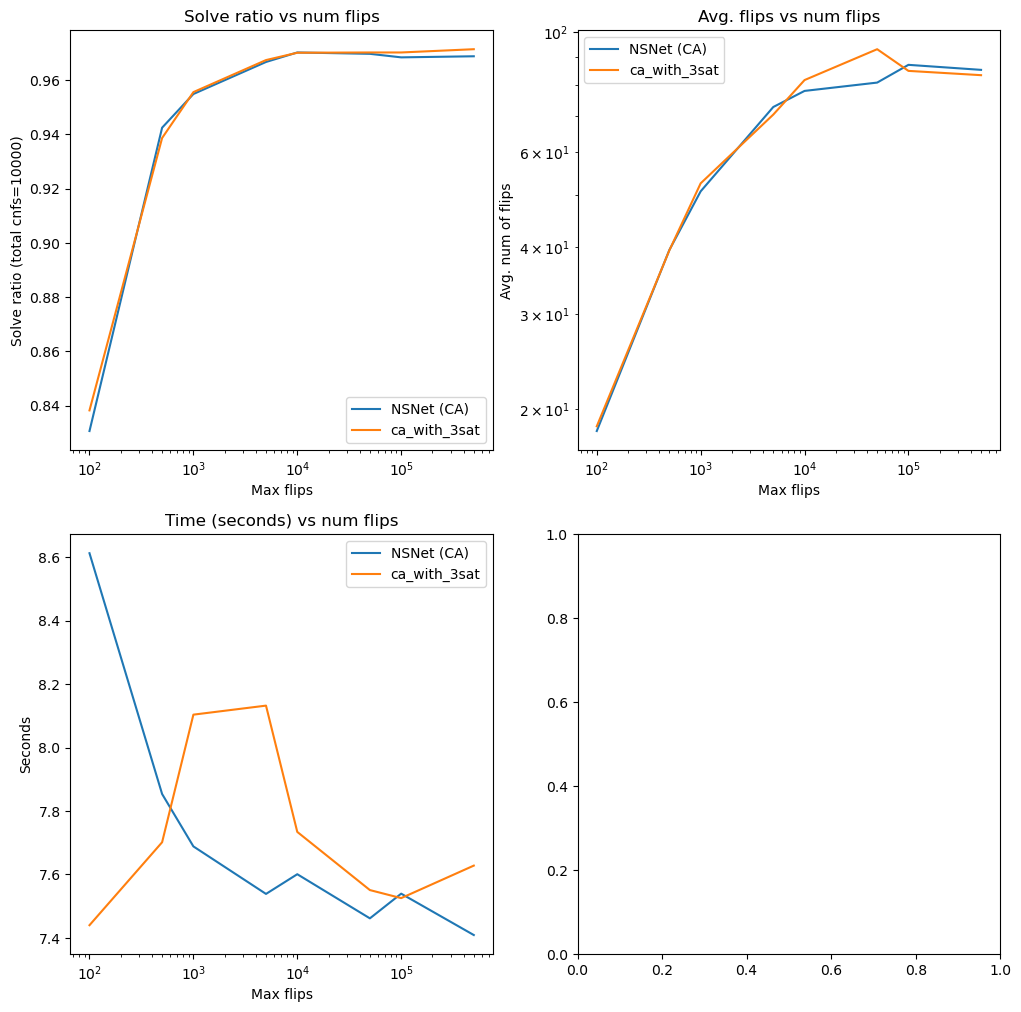

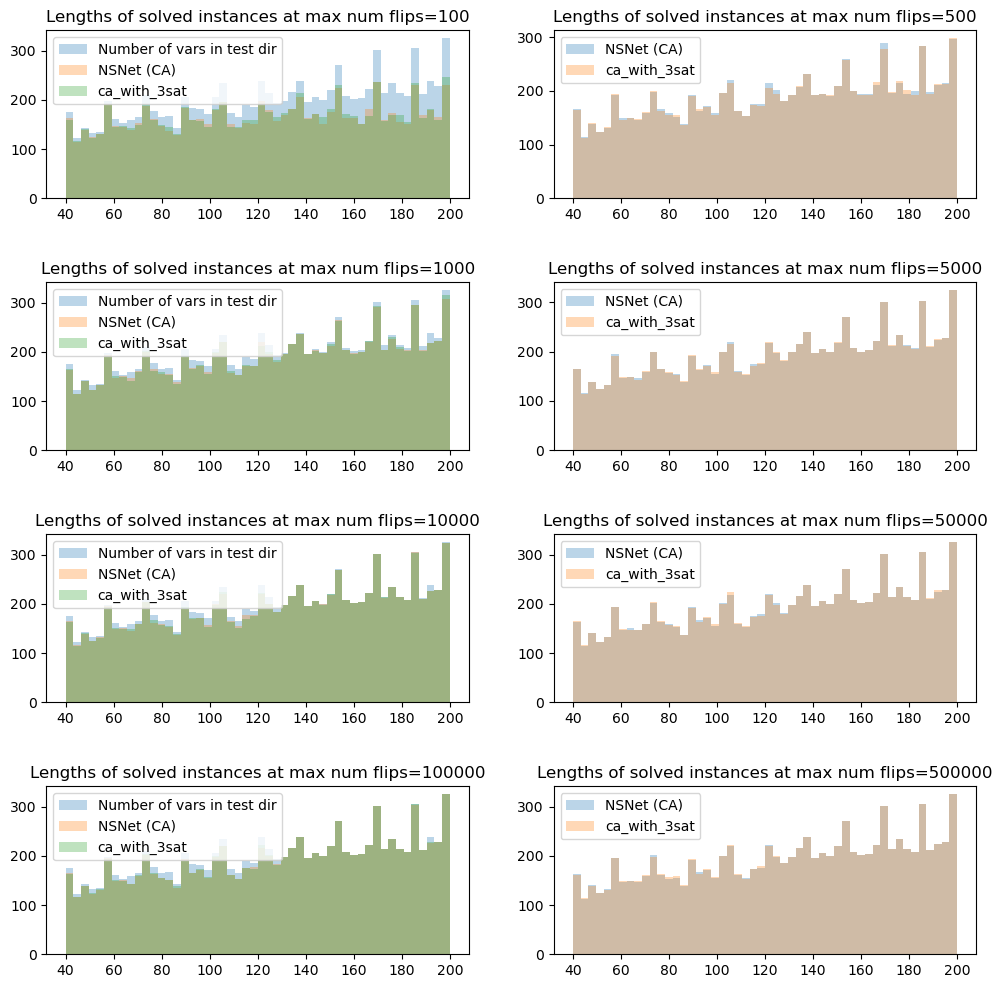

In [17]:
opts_eval.test_dir = opts_infer.test_dir
opts_eval.out_name = opts_infer.out_name       # .out pre-assignment file
printr(opts_eval)

num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

# Solve SAT with NSNet and Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=f"data_maxflip_ca_nsnet.pkl",
)
# Solve SAT with NSNet and Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
)
# Plot results - COMPARE WITH initial results using SR checkpoint
make_plots_from_pickle(
    pickle_fname_other="data_maxflip_ca_nsnet.pkl",
    pickle_fname_nsnet=f"data_maxflip_{opts_infer.out_name}_nsnet.pkl",
    label_nsnet=opts_infer.out_name,
    label_other="NSNet (CA)"
)


In [15]:
!head ../SATSolving/ca/test_hard/06176.cnf

c Modularity-based k-CNF Generator (V2.0). J. Giraldez-Cru and J. Levy
c   value n = 189
c   value m = 585
c   value k = 3
c   value Q = 0.796955
c   value c = 8
c   value seed = 115283510
p cnf 189 585
174 -181 -175 0
173 -182 171 0


### Eval on `CA` test data

Running eval with Sparrow-only
    pickle_fname='data_maxflip_ca_sparrow.pkl'
    opts.test_dir='../SATSolving/ca/test_hard'
Running with 100 max flips. Done in 8.12 sec.
Running with 500 max flips. Done in 8.44 sec.
Running with 1000 max flips. Done in 7.81 sec.
Running with 5000 max flips. Done in 7.84 sec.
Running with 10000 max flips. Done in 7.55 sec.
Running with 50000 max flips. Done in 8.62 sec.
Running with 100000 max flips. Done in 7.48 sec.
Running with 500000 max flips. Done in 7.59 sec.


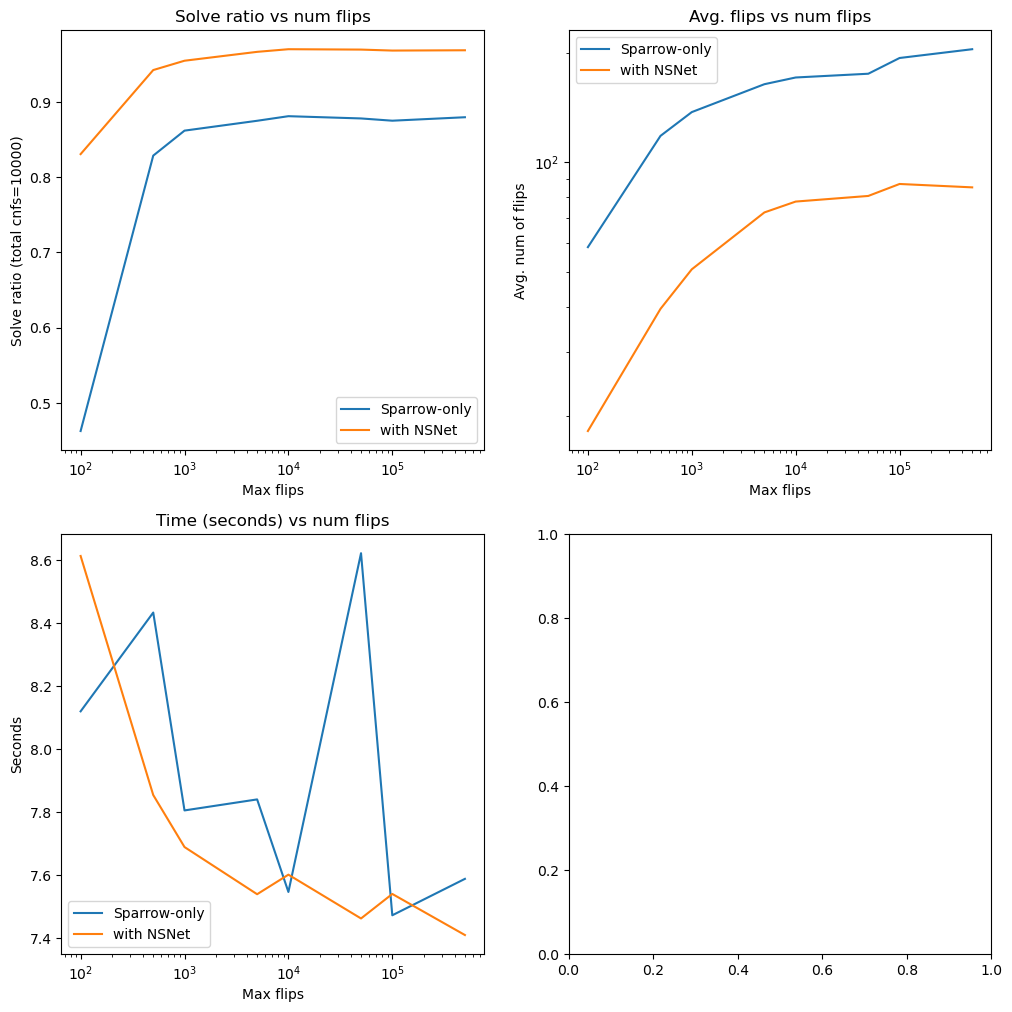

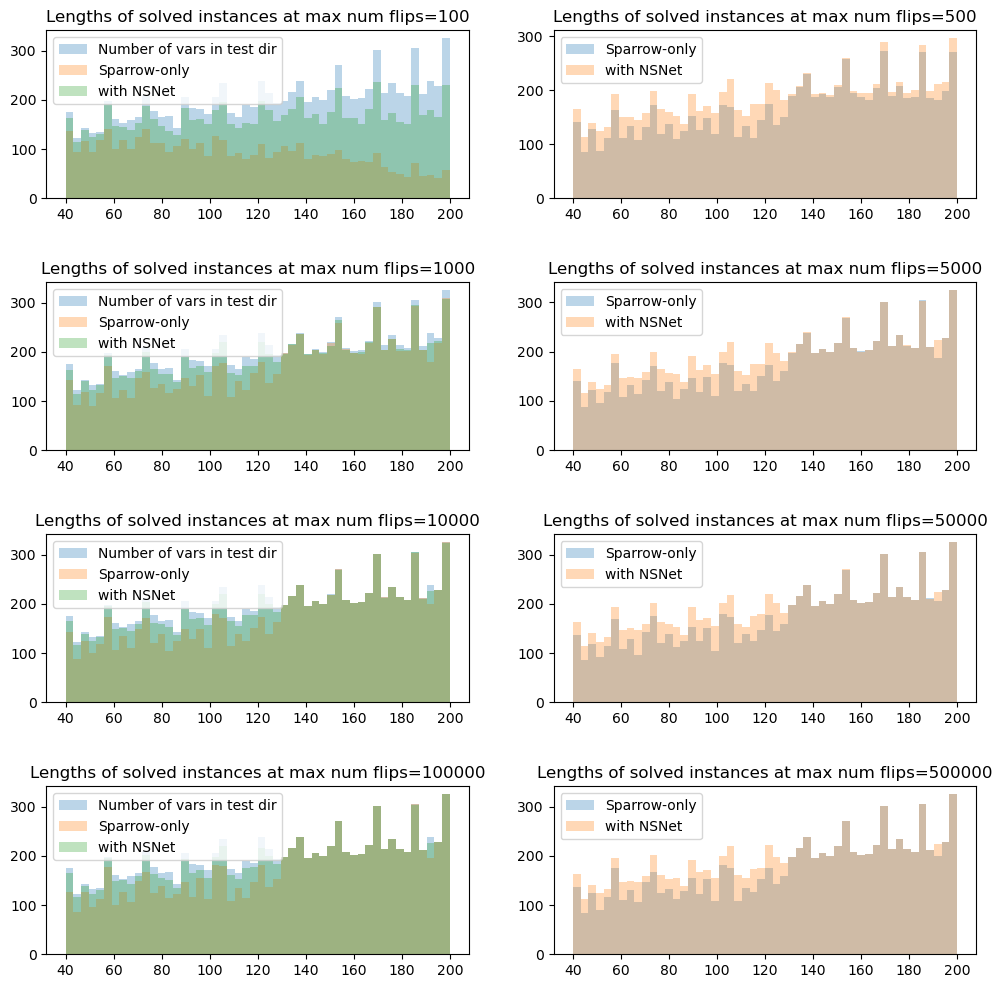

In [18]:
# Solve CA with Sparrow
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name=None,   # Sparrow-only
    pickle_fname=f"data_maxflip_ca_sparrow.pkl",
)
# Plot results - COMPARE WITH initial results using CA checkpoint
make_plots_from_pickle(
    pickle_fname_other="data_maxflip_ca_sparrow.pkl",
    pickle_fname_nsnet=f"data_maxflip_ca_nsnet.pkl",
)

### Eval on `SR` test data

In [62]:
opts_eval.test_dir = "../SATSolving/sr/test_hard"
opts_eval.out_name = None       # .out pre-assignment file
printr(opts_eval)

ArgOpts(timeout=5000, n_process=8, test_dir='../SATSolving/sr/test_hard', out_name=None, model=None, trial=0, 
max_flips=500000, solver='Sparrow')

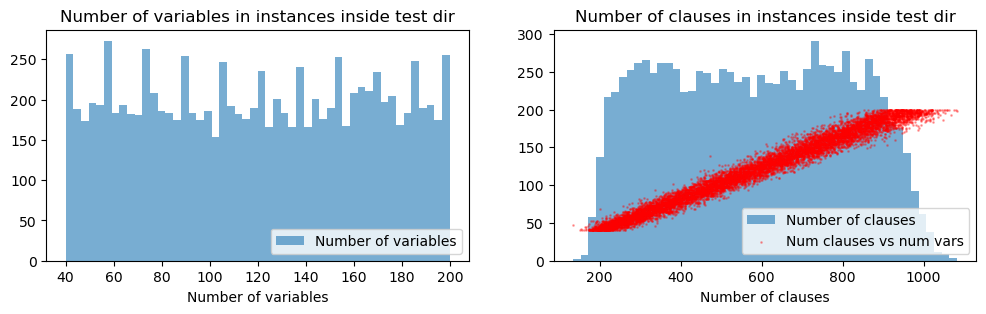

In [63]:
num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

#### Sparrow solver **with** NSNet pre-assigned of variables

Using model (marginals inference with):
- `src/runs/sat_nsnet_sr_marginal/checkpoints/model_best.pt`

In [39]:
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname="data_maxflip_sr_nsnet.pkl",
)
num_cnfs

Running eval with NSNet
pickle_fname='data_maxflip_sr_nsnet.pkl' opts.test_dir='../SATSolving/sr/test_hard'
Running with 100 max flips. Done in 8.58 sec.
Running with 500 max flips. Done in 8.59 sec.
Running with 1000 max flips. Done in 8.25 sec.
Running with 5000 max flips. Done in 8.27 sec.
Running with 10000 max flips. Done in 8.47 sec.
Running with 50000 max flips. Done in 9.34 sec.
Running with 100000 max flips. Done in 9.70 sec.
Running with 500000 max flips. Done in 10.94 sec.


10000

In [40]:
(
    s_counts, s_ratios, s_all_avg_flips, s_all_seconds,
    s_lengths_solved, s_all_max_flips, s_num_cnfs, s_cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name=None,
    pickle_fname="data_maxflip_sr_sparrow.pkl",
)

Running eval with Sparrow-only
pickle_fname='data_maxflip_sr_sparrow.pkl' opts.test_dir='../SATSolving/sr/test_hard'
Running with 100 max flips. Done in 8.07 sec.
Running with 500 max flips. Done in 7.74 sec.
Running with 1000 max flips. Done in 7.78 sec.
Running with 5000 max flips. Done in 7.98 sec.
Running with 10000 max flips. Done in 8.29 sec.
Running with 50000 max flips. Done in 9.15 sec.
Running with 100000 max flips. Done in 9.60 sec.
Running with 500000 max flips. Done in 10.87 sec.


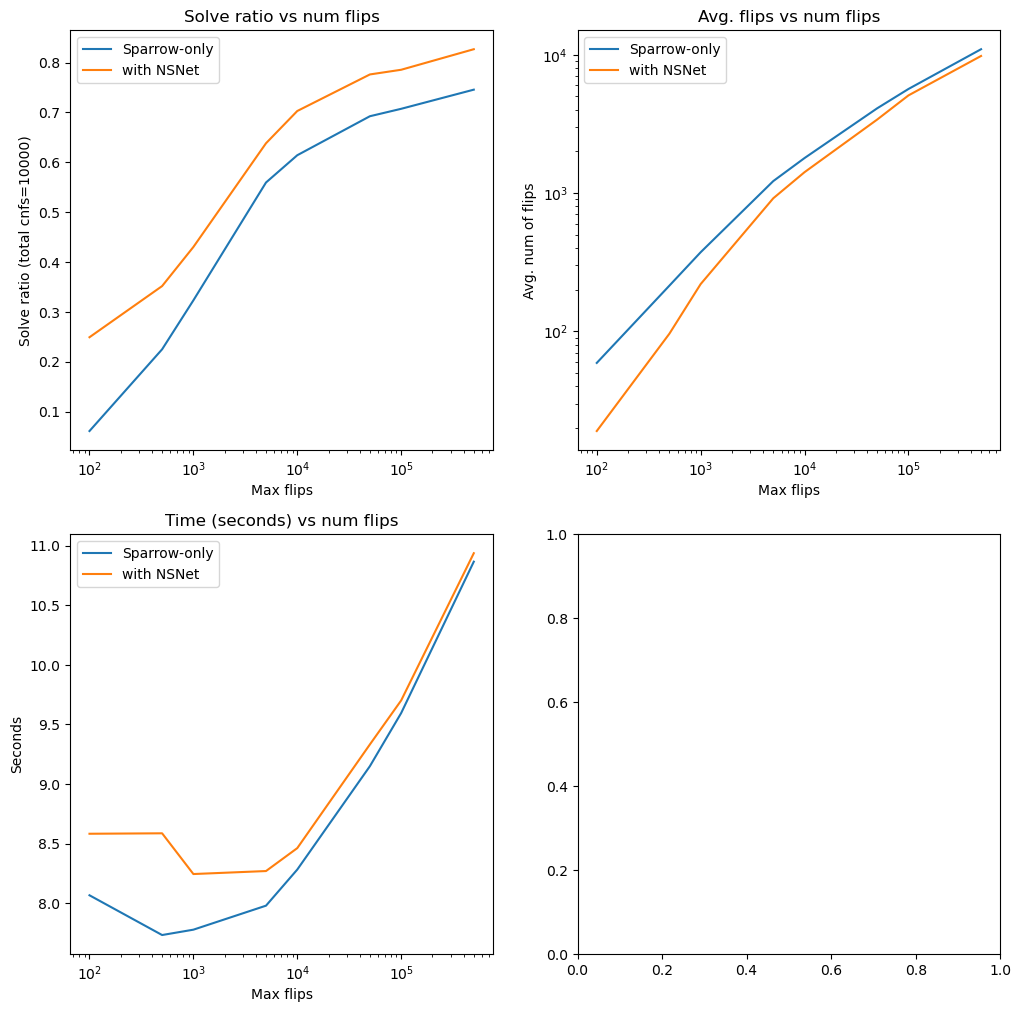

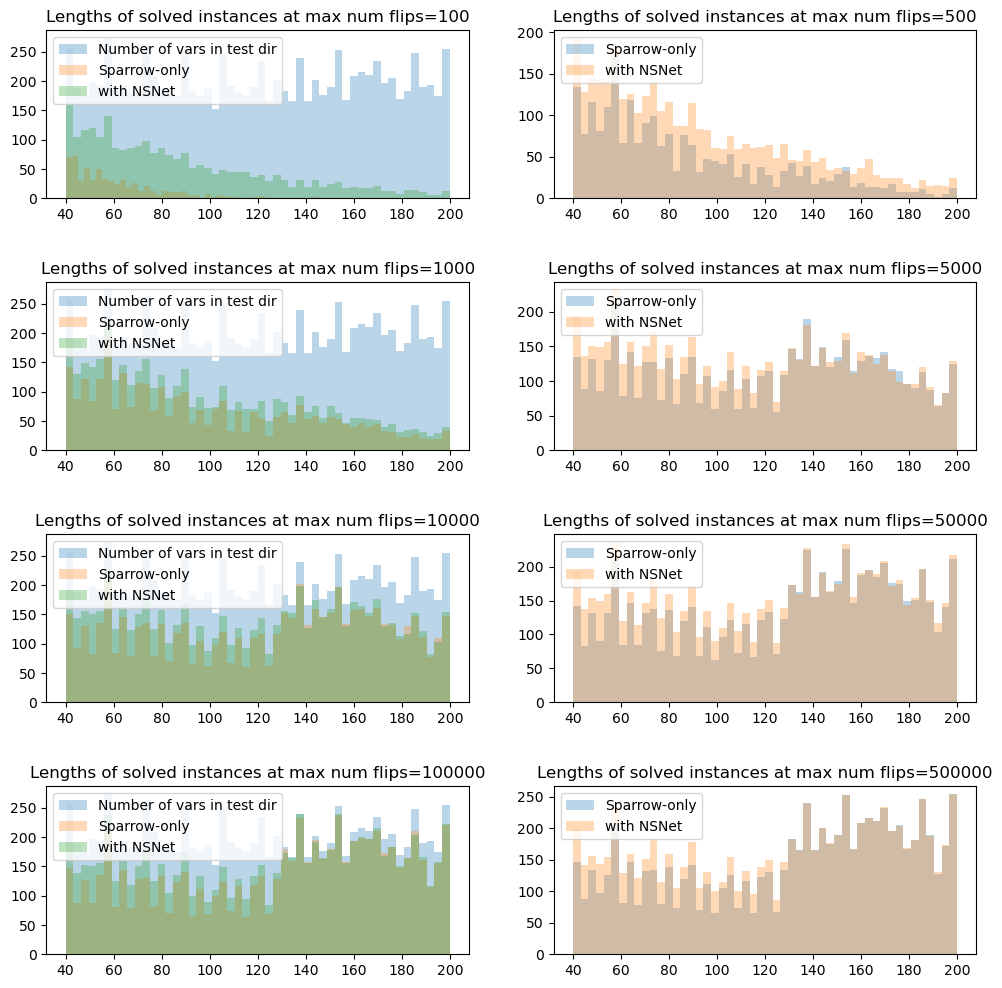

In [44]:
make_plots_from_pickle(
    pickle_fname_nsnet="data_maxflip_sr_nsnet.pkl",
    pickle_fname_other="data_maxflip_sr_sparrow.pkl",
)

### Eval on `3-SAT` data

In [56]:
opts_eval.test_dir = "../SATSolving/3-sat/test_hard"
opts_eval.out_name = None       # .out pre-assignment file
pickle_fname_nsnet = "data_maxflip_3-sat_nsnet.pkl"
pickle_fname_sparrow = "data_maxflip_3-sat_sparrow.pkl"
printr(opts_eval)

ArgOpts(timeout=5000, n_process=8, test_dir='../SATSolving/3-sat/test_hard', out_name=None, model=None, trial=0, 
max_flips=500000, solver='Sparrow')

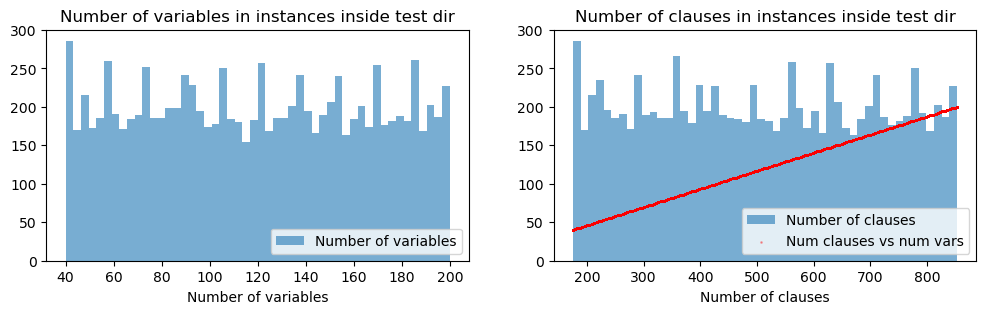

In [60]:
num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)
plot_num_clauses_vars(num_vars=num_vars, num_clauses=num_clauses)

#### Sparrow solver **with** NSNet pre-assigned of variables

Using model (marginals inference with):
- `src/runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt`

In [53]:
(
    counts, ratios, all_avg_flips, all_seconds,
    lengths_solved, all_max_flips, num_cnfs, cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name="NSNet",
    pickle_fname=pickle_fname_nsnet,
)
num_cnfs

Running eval with NSNet
pickle_fname='data_maxflip_3-sat_nsnet.pkl' opts.test_dir='../SATSolving/3-sat/test_hard'
Running with 100 max flips. Done in 8.93 sec.
Running with 500 max flips. Done in 8.88 sec.
Running with 1000 max flips. Done in 8.99 sec.
Running with 5000 max flips. Done in 8.95 sec.
Running with 10000 max flips. Done in 8.52 sec.
Running with 50000 max flips. Done in 8.86 sec.
Running with 100000 max flips. Done in 9.65 sec.
Running with 500000 max flips. Done in 11.25 sec.


10000

In [55]:
(
    s_counts, s_ratios, s_all_avg_flips, s_all_seconds,
    s_lengths_solved, s_all_max_flips, s_num_cnfs, s_cnfs_dir
) = run_eval_multi_flips(
    opts_eval,
    model_name=None,
    pickle_fname=pickle_fname_sparrow,
)
s_num_cnfs, s_cnfs_dir

Running eval with Sparrow-only
    pickle_fname='data_maxflip_3-sat_sparrow.pkl'
    opts.test_dir='../SATSolving/3-sat/test_hard'
Running with 100 max flips. Done in 8.10 sec.
Running with 500 max flips. Done in 8.28 sec.
Running with 1000 max flips. Done in 8.22 sec.
Running with 5000 max flips. Done in 8.17 sec.
Running with 10000 max flips. Done in 8.39 sec.
Running with 50000 max flips. Done in 9.05 sec.
Running with 100000 max flips. Done in 9.31 sec.
Running with 500000 max flips. Done in 10.34 sec.


(10000, '../SATSolving/3-sat/test_hard')

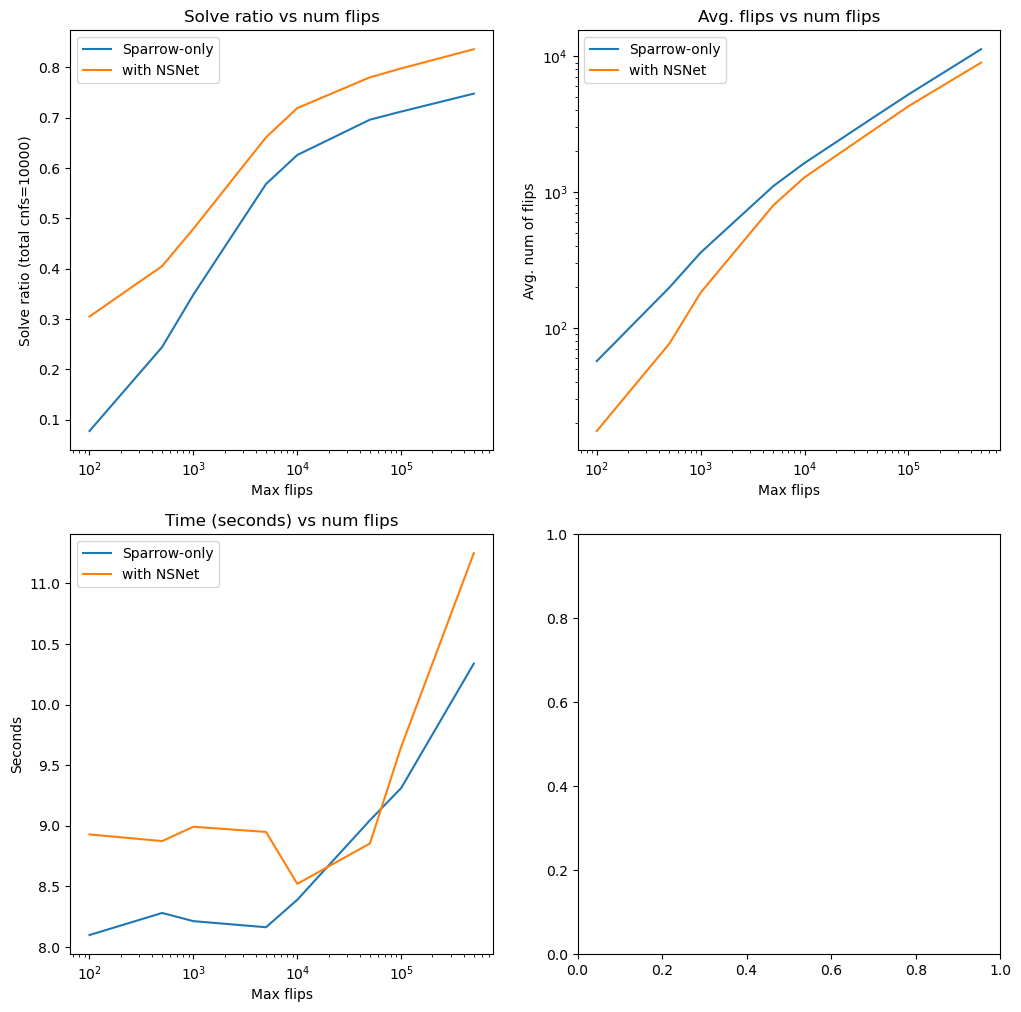

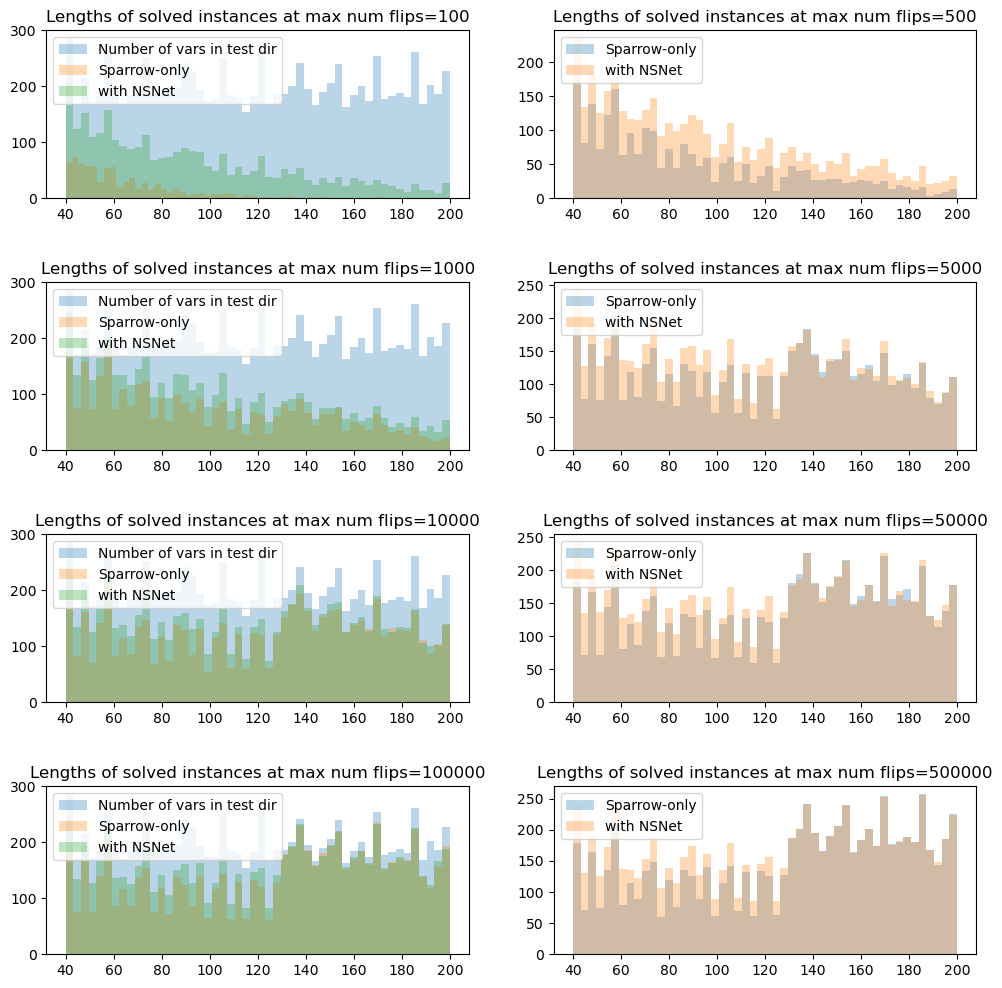

In [57]:
make_plots_from_pickle(
    pickle_fname_nsnet=pickle_fname_nsnet,
    pickle_fname_other=pickle_fname_sparrow,
)

#### Test / train dataset: 3-SAT, SR, Community Attachment (community structure)

Train instances (30.000 per 3SAT/CA/SR): 10 to 40 variables

Validation instances (10.000 per 3SAT/CA/SR): 10 to 40 variables

**Test (hard) instances** (10.000 per 3SAT/CA/SR): **40 to 200 variables**

### 3-SAT perf - synthetic test set

In [6]:
opts_eval = ArgOpts(
    test_dir="../SATSolving/3-sat/test_hard",    # *** between 40 and 200 variables
    solver="Sparrow",
    max_flips=100,
    timeout=5000,
    n_process=8,
    trial=0,
    model="NSNet",       # ---> out file with fname: "05095_NSNet.out"
)

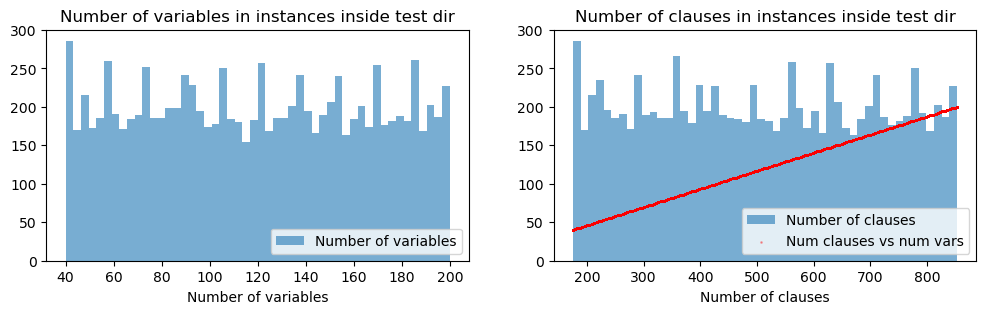

In [101]:
num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), )
ax1.hist(num_vars, bins=50, alpha=0.6, label="Number of variables")
ax1.set_xlabel("Number of variables")
ax1.legend(loc="lower right")
ax1.set_title("Number of variables in instances inside test dir")
ax2.hist(num_clauses, bins=50, alpha=0.6, label="Number of clauses")
ax2.scatter(num_clauses, num_vars, label="Num clauses vs num vars", alpha=0.3, color="red", s=1)
ax2.set_xlabel("Number of clauses")
ax2.legend(loc="lower right")
ax2.set_title("Number of clauses in instances inside test dir")
plt.show()

#### Sparrow solver **with** NSNet pre-assigned of variables

Using model (marginals inference with):
- `src/runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt`

In [39]:
counts, ratios, all_avg_flips, all_seconds, lengths_solved = [], [], [], [], []

all_max_flips = (100, 500, 1_000, 5_000, 10_000, 50_000, 100_000, 500_000)

for max_flips in all_max_flips:
    opts_eval.set("max_flips", max_flips)
    opts_eval.set("model", "NSNet")
    print("Running with NSNet preassignment and", max_flips, "max flips")
    all_results, total, count, ratio, avg_flips, seconds = run_sat_solver(opts_eval)
    lengths_solved.append([len(res[1]) for res in all_results if res[0] == 1])
    counts.append(count)
    ratios.append(ratio)
    all_avg_flips.append(avg_flips)
    all_seconds.append(seconds)

Running with NSNet preassignment and 100 max flips
Running with NSNet preassignment and 500 max flips
Running with NSNet preassignment and 1000 max flips
Running with NSNet preassignment and 5000 max flips
Running with NSNet preassignment and 10000 max flips
Running with NSNet preassignment and 50000 max flips
Running with NSNet preassignment and 100000 max flips
Running with NSNet preassignment and 500000 max flips


In [99]:
# Save data to pickle
raise
data_nsnet = counts, ratios, all_avg_flips, all_seconds, lengths_solved
with open("data_maxflip_3sat_nsnet.pkl", "wb") as f:
    pickle.dump(data_nsnet, f)

In [ ]:
# Load data from pickle
with open("data_maxflip_3sat_nsnet.pkl", "wb") as f:
    counts, ratios, all_avg_flips, all_seconds, lengths_solved = pickle.load(f)

#### Sparrow solver only

In [40]:
s_counts, s_ratios, s_all_avg_flips, s_all_seconds, s_lengths_solved = [], [], [], [], []

for max_flips in all_max_flips:
    opts_eval.set("max_flips", max_flips)
    opts_eval.set("model", None)
    print("Running with NSNet preassignment and", max_flips, "max flips")
    all_results, total, count, ratio, avg_flips, seconds = run_sat_solver(opts_eval)
    s_lengths_solved.append([len(res[1]) for res in all_results if res[0] == 1])
    s_counts.append(count)
    s_ratios.append(ratio)
    s_all_avg_flips.append(avg_flips)
    s_all_seconds.append(seconds)

Running with NSNet preassignment and 100 max flips
Running with NSNet preassignment and 500 max flips
Running with NSNet preassignment and 1000 max flips
Running with NSNet preassignment and 5000 max flips
Running with NSNet preassignment and 10000 max flips
Running with NSNet preassignment and 50000 max flips
Running with NSNet preassignment and 100000 max flips
Running with NSNet preassignment and 500000 max flips


In [100]:
# Save data to pickle
raise
data_sparrow = s_counts, s_ratios, s_all_avg_flips, s_all_seconds, s_lengths_solved
with open("data_maxflip_3sat_sparrow.pkl", "wb") as f:
    pickle.dump(data_sparrow, f)

In [ ]:
# Load data from pickle
with open("data_maxflip_3sat_sparrow.pkl", "wb") as f:
    s_counts, s_ratios, s_all_avg_flips, s_all_seconds, s_lengths_solved = pickle.load(f)

#### Plot results: Sparrow only vs NSNet

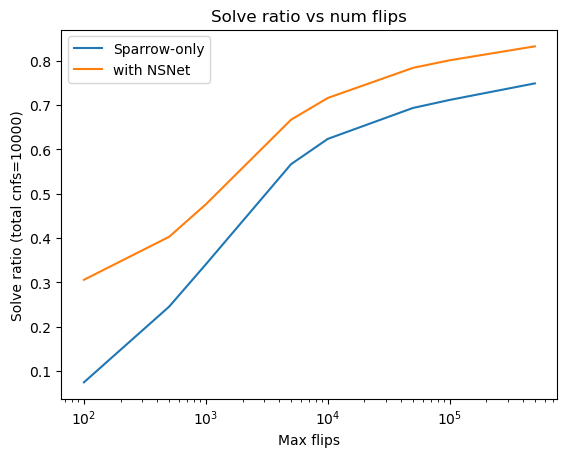

In [30]:
plt.plot(all_max_flips, s_ratios, label="Sparrow-only")
plt.plot(all_max_flips, ratios, label="with NSNet")
plt.legend()
plt.xticks(all_max_flips)
plt.title("Solve ratio vs num flips")
plt.xlabel("Max flips")
plt.ylabel(f"Solve ratio (total cnfs={len(all_results)})")
plt.xscale("log")

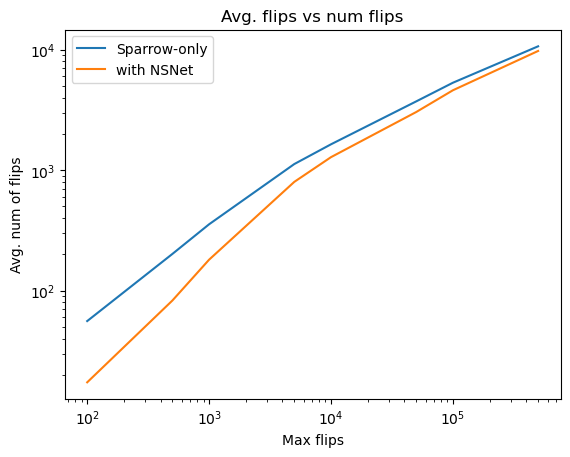

In [28]:
plt.plot(all_max_flips, s_all_avg_flips, label="Sparrow-only")
plt.plot(all_max_flips, all_avg_flips, label="with NSNet")
plt.xticks(all_max_flips)
plt.legend()
plt.title("Avg. flips vs num flips")
plt.xlabel("Max flips")
plt.ylabel(f"Avg. num of flips")
plt.xscale("log")
plt.yscale("log")

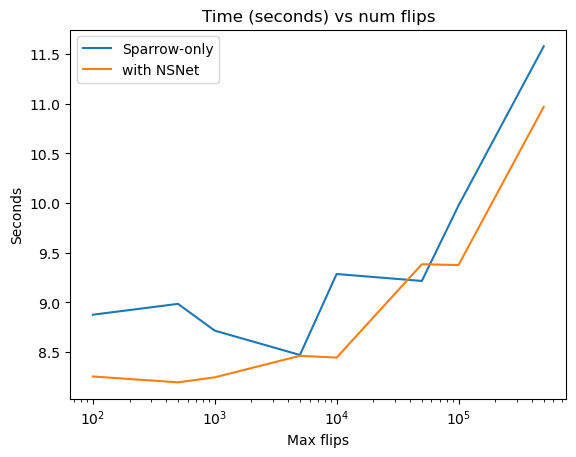

In [29]:
plt.plot(all_max_flips, s_all_seconds, label="Sparrow-only")
plt.plot(all_max_flips, all_seconds, label="with NSNet")
plt.xticks(all_max_flips)
plt.legend()
plt.title("Time (seconds) vs num flips")
plt.xlabel("Max flips")
plt.ylabel(f"Seconds")
plt.xscale("log")

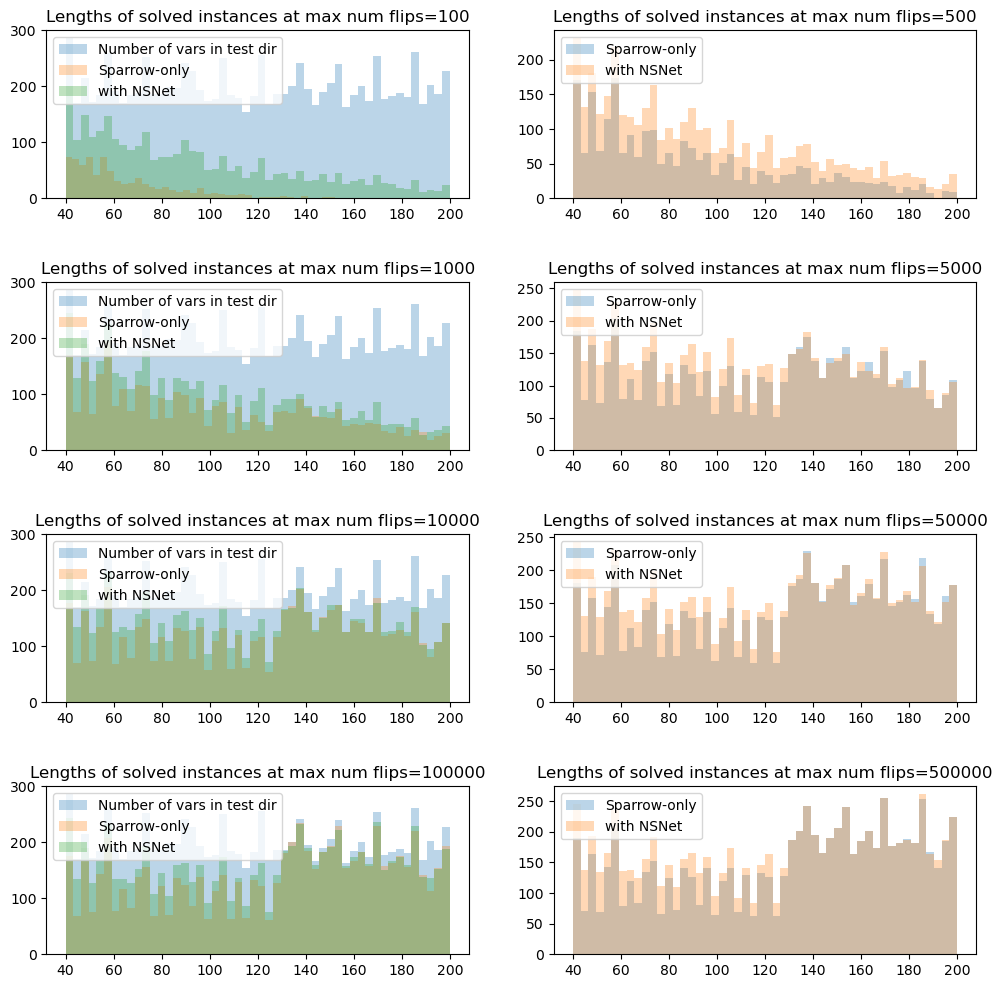

In [92]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12), )
plt.subplots_adjust(hspace=0.5)

for i, (ax_left, ax_right) in enumerate(axes):
    ix_left = i * 2
    ix_right = ix_left + 1
    ax_left.hist(num_vars, bins=50, alpha=0.3, label="Number of vars in test dir")
    ax_left.hist(s_lengths_solved[ix_left], bins=50, alpha=0.3, label="Sparrow-only")
    ax_left.hist(lengths_solved[ix_left], bins=50, alpha=0.3, label="with NSNet")
    ax_left.legend(loc="upper left")
    ax_left.set_title(f"Lengths of solved instances at max num flips={all_max_flips[ix_left]}")
    ax_right.hist(s_lengths_solved[ix_right], bins=50, alpha=0.3, label="Sparrow-only")
    ax_right.hist(lengths_solved[ix_right], bins=50, alpha=0.3, label="with NSNet")
    ax_right.legend(loc="upper left")
    ax_right.set_title(f"Lengths of solved instances at max num flips={all_max_flips[ix_right]}")
plt.show()

### SR perf - synthetic test set

In [12]:
opts_eval.set("test_dir", "../SATSolving/sr/test_hard")

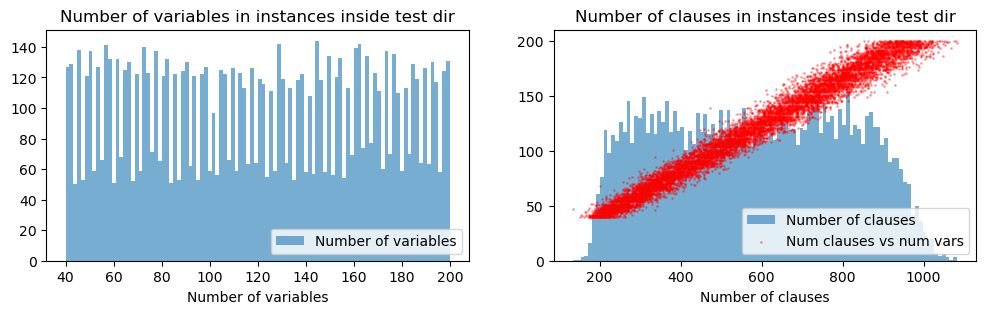

In [13]:
num_vars, num_clauses = count_vars_clauses(opts_eval.test_dir)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), )
ax1.hist(num_vars, bins=100, alpha=0.6, label="Number of variables")
ax1.set_xlabel("Number of variables")
ax1.legend(loc="lower right")
ax1.set_title("Number of variables in instances inside test dir")
ax2.hist(num_clauses, bins=100, alpha=0.6, label="Number of clauses")
ax2.scatter(num_clauses, num_vars, label="Num clauses vs num vars", alpha=0.3, color="red", s=1)
ax2.set_xlabel("Number of clauses")
ax2.legend(loc="lower right")
ax2.set_title("Number of clauses in instances inside test dir")
plt.show()

#### (SR) Sparrow solver **with** NSNet pre-assigned of variables

Using model (marginals inference with):
- `src/runs/sat_nsnet_sr_marginal/checkpoints/model_best.pt`

In [14]:
counts, ratios, all_avg_flips, all_seconds, lengths_solved = [], [], [], [], []

all_max_flips = (100, 500, 1_000, 5_000, 10_000, 50_000, 100_000, 500_000)

for max_flips in all_max_flips:
    opts_eval.set("max_flips", max_flips)
    opts_eval.set("model", "NSNet")
    print("Running with NSNet preassignment and", max_flips, "max flips")
    all_results, total, count, ratio, avg_flips, seconds = run_sat_solver(opts_eval)
    lengths_solved.append([len(res[1]) for res in all_results if res[0] == 1])
    counts.append(count)
    ratios.append(ratio)
    all_avg_flips.append(avg_flips)
    all_seconds.append(seconds)

Running with NSNet preassignment and 100 max flips
Running with NSNet preassignment and 500 max flips
Running with NSNet preassignment and 1000 max flips
Running with NSNet preassignment and 5000 max flips
Running with NSNet preassignment and 10000 max flips
Running with NSNet preassignment and 50000 max flips
Running with NSNet preassignment and 100000 max flips
Running with NSNet preassignment and 500000 max flips


In [15]:
# Save data to pickle
raise
data_nsnet = counts, ratios, all_avg_flips, all_seconds, lengths_solved
with open("data_maxflip_sr_nsnet.pkl", "wb") as f:
    pickle.dump(data_nsnet, f)

In [ ]:
# Load data from pickle
with open("data_maxflip_sr_nsnet.pkl", "rb") as f:
    counts, ratios, all_avg_flips, all_seconds, lengths_solved = pickle.load(f)

#### Sparrow solver only

In [16]:
s_counts, s_ratios, s_all_avg_flips, s_all_seconds, s_lengths_solved = [], [], [], [], []

for max_flips in all_max_flips:
    opts_eval.set("max_flips", max_flips)
    opts_eval.set("model", None)
    print("Running with NSNet preassignment and", max_flips, "max flips")
    all_results, total, count, ratio, avg_flips, seconds = run_sat_solver(opts_eval)
    s_lengths_solved.append([len(res[1]) for res in all_results if res[0] == 1])
    s_counts.append(count)
    s_ratios.append(ratio)
    s_all_avg_flips.append(avg_flips)
    s_all_seconds.append(seconds)

Running with NSNet preassignment and 100 max flips
Running with NSNet preassignment and 500 max flips
Running with NSNet preassignment and 1000 max flips
Running with NSNet preassignment and 5000 max flips
Running with NSNet preassignment and 10000 max flips
Running with NSNet preassignment and 50000 max flips
Running with NSNet preassignment and 100000 max flips
Running with NSNet preassignment and 500000 max flips


In [17]:
# Save data to pickle
raise
data_sparrow = s_counts, s_ratios, s_all_avg_flips, s_all_seconds, s_lengths_solved
with open("data_maxflip_sr_sparrow.pkl", "wb") as f:
    pickle.dump(data_sparrow, f)

In [ ]:
# Load data from pickle
with open("data_maxflip_sr_sparrow.pkl", "rb") as f:
    s_counts, s_ratios, s_all_avg_flips, s_all_seconds, s_lengths_solved = pickle.load(f)

#### Plot results: Sparrow only vs NSNet

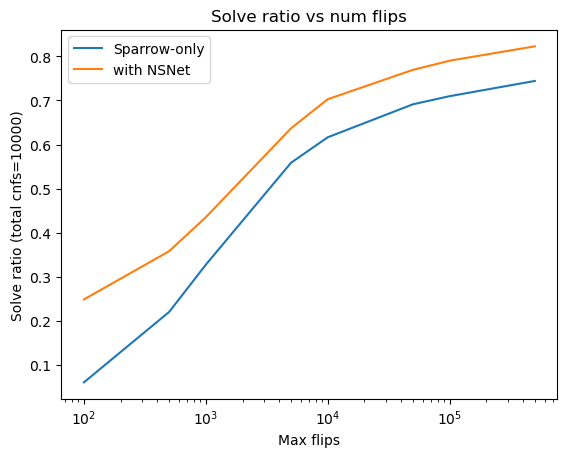

In [18]:
plt.plot(all_max_flips, s_ratios, label="Sparrow-only")
plt.plot(all_max_flips, ratios, label="with NSNet")
plt.legend()
plt.xticks(all_max_flips)
plt.title("Solve ratio vs num flips")
plt.xlabel("Max flips")
plt.ylabel(f"Solve ratio (total cnfs={len(all_results)})")
plt.xscale("log")

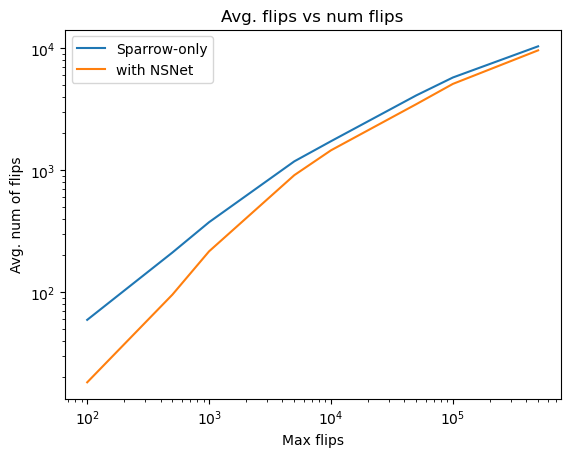

In [19]:
plt.plot(all_max_flips, s_all_avg_flips, label="Sparrow-only")
plt.plot(all_max_flips, all_avg_flips, label="with NSNet")
plt.xticks(all_max_flips)
plt.legend()
plt.title("Avg. flips vs num flips")
plt.xlabel("Max flips")
plt.ylabel(f"Avg. num of flips")
plt.xscale("log")
plt.yscale("log")

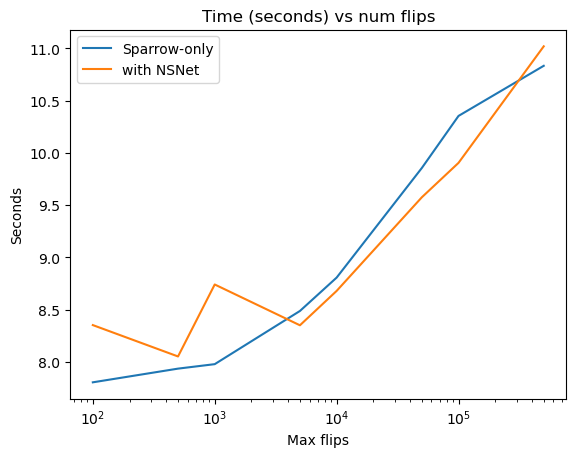

In [20]:
plt.plot(all_max_flips, s_all_seconds, label="Sparrow-only")
plt.plot(all_max_flips, all_seconds, label="with NSNet")
plt.xticks(all_max_flips)
plt.legend()
plt.title("Time (seconds) vs num flips")
plt.xlabel("Max flips")
plt.ylabel(f"Seconds")
plt.xscale("log")

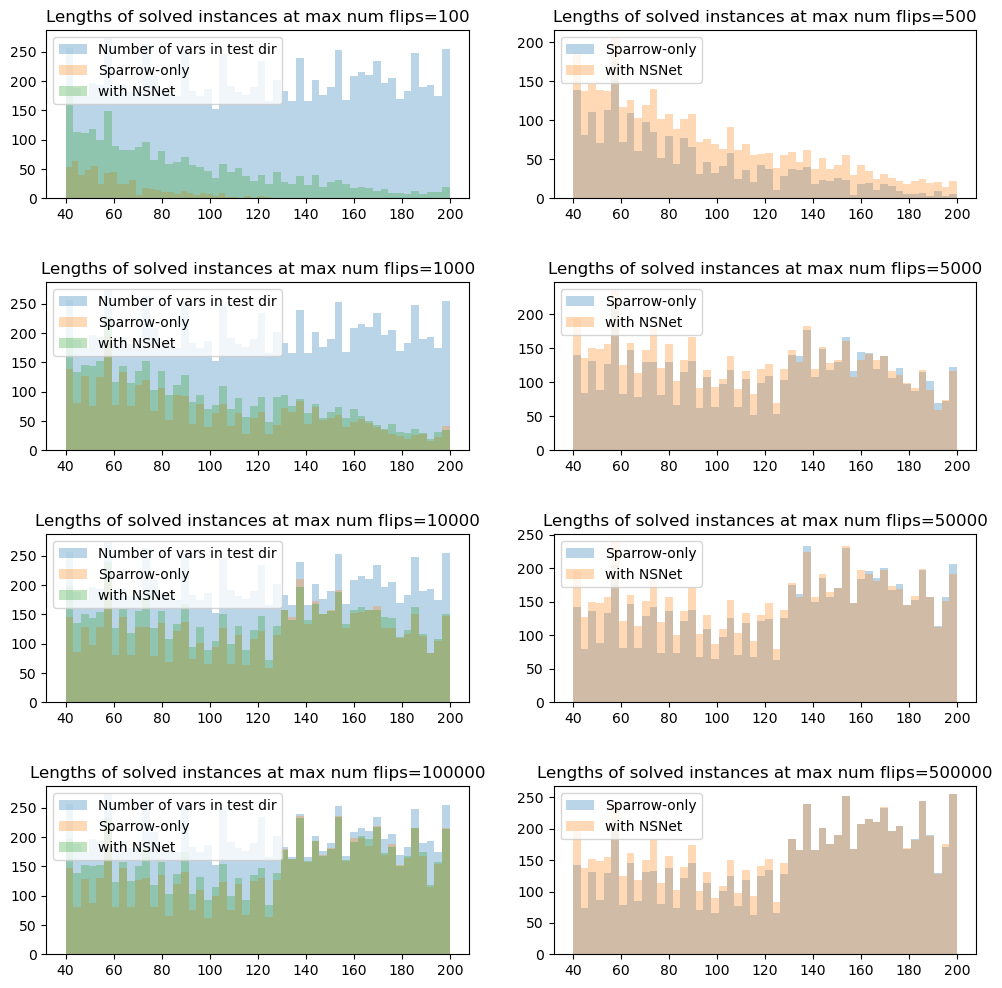

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12), )
plt.subplots_adjust(hspace=0.5)

for i, (ax_left, ax_right) in enumerate(axes):
    ix_left = i * 2
    ix_right = ix_left + 1
    ax_left.hist(num_vars, bins=50, alpha=0.3, label="Number of vars in test dir")
    ax_left.hist(s_lengths_solved[ix_left], bins=50, alpha=0.3, label="Sparrow-only")
    ax_left.hist(lengths_solved[ix_left], bins=50, alpha=0.3, label="with NSNet")
    ax_left.legend(loc="upper left")
    ax_left.set_title(f"Lengths of solved instances at max num flips={all_max_flips[ix_left]}")
    ax_right.hist(s_lengths_solved[ix_right], bins=50, alpha=0.3, label="Sparrow-only")
    ax_right.hist(lengths_solved[ix_right], bins=50, alpha=0.3, label="with NSNet")
    ax_right.legend(loc="upper left")
    ax_right.set_title(f"Lengths of solved instances at max num flips={all_max_flips[ix_right]}")
plt.show()

### Some inference runs (CLI)

#### Sparrow simple

```bash
## --- WITHOUT NSNET ---
Namespace(test_dir='SATSolving/3-sat/test_hard', solver='Sparrow', max_flips=100, model=None, timeout=5000, n_process=8, trial=10, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...

Total: 10000, Solved: 815, Ratio: 0.082, Average number of flips: 54.9.
Solving Time: 6.976224
```

#### 3-SAT

```bash
## --- WITH NSNET ---

3-sat Acc: 35.81%(0.13%), Flips: 14.27(0.33)


[Inference] Running Time: 649.236555
Namespace(test_dir='SATSolving/3-sat/test_hard', solver='Sparrow', max_flips=100, model='NSNet', timeout=5000, n_process=8, trial=0, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...
Total: 10000, Solved: 3588, Ratio: 0.359, Average number of flips: 13.9.
Solving Time: 7.335743

Namespace(test_dir='SATSolving/3-sat/test_hard', solver='Sparrow', max_flips=100, model='NSNet', timeout=5000, n_process=8, trial=1, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...
Total: 10000, Solved: 3563, Ratio: 0.356, Average number of flips: 14.2.
Solving Time: 6.883111

Namespace(test_dir='SATSolving/3-sat/test_hard', solver='Sparrow', max_flips=100, model='NSNet', timeout=5000, n_process=8, trial=2, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...
Total: 10000, Solved: 3592, Ratio: 0.359, Average number of flips: 14.7.


```

#### SR

```bash
sr Acc: 10.04%(0.02%), #Flips: 47.03(0.67)


[Inference] Running Time: 2167.898835
Namespace(test_dir='SATSolving/sr/test_hard', solver='Sparrow', max_flips=100, model='NSNet', timeout=5000, n_process=8, trial=0, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...
Total: 10000, Solved: 1002, Ratio: 0.100, Average number of flips: 46.1.
Solving Time: 8.220770

Namespace(test_dir='SATSolving/sr/test_hard', solver='Sparrow', max_flips=100, model='NSNet', timeout=5000, n_process=8, trial=1, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...
Total: 10000, Solved: 1006, Ratio: 0.101, Average number of flips: 47.8.
Solving Time: 7.311601

Namespace(test_dir='SATSolving/sr/test_hard', solver='Sparrow', max_flips=100, model='NSNet', timeout=5000, n_process=8, trial=2, log_dir='runs/Sparrow', eval_dir='runs/Sparrow/evaluations', log='runs/Sparrow/log.txt')
Testing...
Total: 10000, Solved: 1004, Ratio: 0.100, Average number of flips: 47.2.
Solving Time: 7.353861
```

### 3-SAT Marginals Train & inference (CLI)

```bash
$ python src/train_model.py sat-solving --exp_id sat_nsnet_3-sat_marginal --train_dir /opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/train/ --valid_dir /opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/valid/ --epochs 200 --scheduler ReduceLROnPlateau --lr_step_size 20 --loss marginal --batch_size 64 --save_model_epochs 1

Namespace(task='sat-solving', exp_id='sat_nsnet_3-sat_marginal', train_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/train/', train_size=None, valid_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/valid/', loss='marginal', restore=None, save_model_epochs=1, num_workers=8, batch_size=64, epochs=200, lr=0.0001, weight_dacay=1e-10, scheduler='ReduceLROnPlateau', lr_step_size=20, lr_factor=0.5, lr_patience=20, clip_norm=0.65, seed=0, valid_epochs=1, device='cuda', model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='runs/sat_nsnet_3-sat_marginal', checkpoint_dir='runs/sat_nsnet_3-sat_marginal/checkpoints', log='runs/sat_nsnet_3-sat_marginal/log.txt')

...

### --- TEST MODEL (base test set) ---
$ python src/test_model.py sat-solving /opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test/ --checkpoint runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt --batch_size 32
Namespace(task='sat-solving', test_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test/', checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8, batch_size=32, seed=0, model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal', eval_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/evaluations', log='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/log.txt', device=device(type='cuda'))
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Testing...
Total: 10000, Solved: 5263.000000, Ratio: 0.526300
Solving Time: 123.188192


### --- TEST MODEL (hard test set) ---
$ python src/test_model.py sat-solving /opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test_hard/ --checkpoint runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt --batch_size 32
Namespace(task='sat-solving', test_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test_hard/', checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8, batch_size=32, seed=0, model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal', eval_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/evaluations', log='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/log.txt', device=device(type='cuda'))
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Testing...
Total: 10000, Solved: 585.000000, Ratio: 0.058500
Solving Time: 180.124360


```

```bash


```

```bash
Namespace(task='sat-solving', test_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test/', checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8, batch_size=32, seed=0, model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal', eval_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/evaluations', log='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/log.txt', device=device(type='cuda'))
Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Testing...
Total: 10000, Solved: 5263.000000, Ratio: 0.526300
Solving Time: 123.188192

Namespace(task='sat-solving', test_dir='/opt/files/maio2022/SAT/NSNet/SATSolving/3-sat/test_hard/', checkpoint='runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt', num_workers=8, batch_size=32, seed=0, model='NSNet', dim=64, n_rounds=10, n_mlp_layers=3, activation='relu', log_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal', eval_dir='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/evaluations', log='/mnt/c/kit/srv/maio2022/SAT/NSNet/runs/sat_nsnet_3-sat_marginal/log.txt', device=device(type='cuda'))

Loading model checkpoint from runs/sat_nsnet_3-sat_marginal/checkpoints/model_best.pt..
Testing...
Total: 10000, Solved: 585.000000, Ratio: 0.058500
Solving Time: 180.124360
```

### Instance types - Community attachment

- Jesús Giráldez-Cru and Jordi Levy. A modularity-based random sat instances generator. In Twenty-Fourth International Joint Conference on Artificial Intelligence, 2015.

- https://www.ugr.es/~jgiraldez/publications/2016_AIJ_abstract.html:


Generating SAT instances with community structure - Artificial Intelligence 2016

Nowadays, modern SAT solvers are able to efficiently solve many industrial, or real-world, SAT instances. However, the process of development and testing of new SAT solving techniques is conditioned to the finite and reduced number of known industrial benchmarks. Therefore, new models of random SAT instances generation that capture realistically the features of real-world problems can be beneficial to the SAT community. In many works, the structure of industrial instances has been analyzed representing them as graphs and studying some of their properties, like modularity.

In this work, we use the notion of modularity to define a new model of generation of random SAT instances with community structure, called Community Attachment. For **high values of modularity (i.e., clear community structure)**, we realistically model pseudo-industrial random SAT formulas. This model also generates SAT instances very similar to classical random formulas using a low value of modularity. We also prove that the phase transition point, if exists, is independent on the modularity. We evaluate the adequacy of this model to real industrial SAT problems in terms of SAT solvers performance, and show that modern solvers do actually exploit this community structure. Finally, we use this generator to observe the connections between the modularity of the instance and some components of the solver, such as the variable branching heuristics or the clause learning mechanism.

### Project: **next step**

Urmatoarea tema proiect:

- modificarea / imbunatatirea metodelor implementate
    - modif structuri de date
    - combinat cu local search
    - imbunatatit relzutlatele obtinute

- comparam rezultatele obintute acum cu cele obtinute dupa


Teste statististice -> de folosit in cadrul proiecutului pt analiza rezultatele algo.
- teste parametrice
- teste neparametrice


Goal: transformers architecture to improve results:
- https://github.com/shi27feng/transformers.satisfy
- https://github.com/azreasoners/recurrent_transformer  (most recent!)
- (multiple implementations; satFormer still not available: https://github.com/cure-lab/sat-benchmark)